## Import Libraries and Data Review

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline 
import matplotlib.pyplot as plt
import squarify


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn import decomposition
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram


from yellowbrick.cluster import KElbowVisualizer , SilhouetteVisualizer

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)


import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
1  2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0
2  4141        1965  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0
3  6182        1984  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0
4  5324        1981         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0

In [49]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], dtype='object')

In [50]:
df.shape

(2240, 29)

<a id="exploratory-data-analysis"></a>
# <font color= #FFFFFF> <b> Exploratory Data Analysis (EDA)</b><font color= #FFFFFF>

In [51]:
def numeric_summary(df):
    obs = df.shape[0]
    duplicate_count = df.duplicated().sum()
    
    df_numeric = df.select_dtypes(include='number')
    summary_df = pd.DataFrame({
        'Dtype': df_numeric.dtypes, 
        'Counts': df_numeric.apply(lambda x: x.count()), 
        'Nulls': df_numeric.apply(lambda x: x.isnull().sum()),
        'Min': df_numeric.min(),
        'Max': df_numeric.max(),
        'Uniques': df_numeric.apply(lambda x: x.unique().shape[0]),
        'UniqueValues': df_numeric.apply(lambda x: list(x.unique()) if x.nunique() <= 10 else '-')
    })
    
    # Display df.shape and duplicate count at the beginning
    print(f'1. Data shape (rows, columns): {df.shape}')
    print(f'2. Number of duplicate rows: {duplicate_count}')
    
    return summary_df

numeric_summary(df)

1. Data shape (rows, columns): (2240, 29)
2. Number of duplicate rows: 0


Dtype  Counts  Nulls     Min       Max  Uniques UniqueValues
ID                     int64    2240      0     0.0   11191.0     2240            -
Year_Birth             int64    2240      0  1893.0    1996.0       59            -
Income               float64    2216     24  1730.0  666666.0     1975            -
Kidhome                int64    2240      0     0.0       2.0        3    [0, 1, 2]
Teenhome               int64    2240      0     0.0       2.0        3    [0, 1, 2]
Recency                int64    2240      0     0.0      99.0      100            -
MntWines               int64    2240      0     0.0    1493.0      776            -
MntFruits              int64    2240      0     0.0     199.0      158            -
MntMeatProducts        int64    2240      0     0.0    1725.0      558            -
MntFishProducts        int64    2240      0     0.0     259.0      182            -
MntSweetProducts       int64    2240      0     0.0     263.0      177            -
MntGoldProds           int64    2240      0     0.0     362.0      213            -
NumDealsPurchases      int64    2240      0     0.0      15.0       15            -
NumWebPurchases        int64    2240      0     0.0      27.0       15            -
NumCatalogPurchases    int64    2240      0     0.0      28.0       14            -
NumStorePurchases      int64    2240      0     0.0      13.0       14            -
NumWebVisitsMonth      int64    2240      0     0.0      20.0       16            -
AcceptedCmp3           int64    2240      0     0.0       1.0        2       [0, 1]
AcceptedCmp4           int64    2240      0     0.0       1.0        2       [0, 1]
AcceptedCmp5           int64    2240      0     0.0       1.0        2       [0, 1]
AcceptedCmp1           int64    2240      0     0.0       1.0        2       [0, 1]
AcceptedCmp2           int64    2240      0     0.0       1.0        2       [0, 1]
Complain               int64    2240      0     0.0       1.0        2       [0, 1]
Z_CostContact          int64    2240      0     3.0       3.0        1          [3]
Z_Revenue              int64    2240      0    11.0      11.0        1         [11]
Response               int64    2240      0     0.0       1.0        2       [1, 0]

In [52]:
def object_summary(df):
    obs = df.shape[0]
    duplicate_count = df.duplicated().sum()
    
    object_df = df.select_dtypes(include='object')
    summary_df = pd.DataFrame({
        'Dtype': object_df.dtypes,
        'Counts': object_df.apply(lambda x: x.count()),
        'Nulls': object_df.apply(lambda x: x.isnull().sum()),
        'Top': object_df.apply(lambda x: x.mode()[0] if not x.mode().empty else '-'),
        'Frequency': object_df.apply(lambda x: x.value_counts().max() if not x.value_counts().empty else '-'),
        'Uniques': object_df.apply(lambda x: x.unique().shape[0]),
        'UniqueValues': object_df.apply(lambda x: list(x.unique()) if x.nunique() <= 10 else '-')
    })
    
    # Display df.shape and duplicate count at the beginning
    print(f'1. Data shape (rows, columns): {df.shape}')
    print(f'2. Number of duplicate rows: {duplicate_count}')
    
    return summary_df

object_summary(df)

1. Data shape (rows, columns): (2240, 29)
2. Number of duplicate rows: 0


Dtype  Counts  Nulls         Top  Frequency  Uniques                                       UniqueValues
Education       object    2240      0  Graduation       1127        5         [Graduation, PhD, Master, Basic, 2n Cycle]
Marital_Status  object    2240      0     Married        864        8  [Single, Together, Married, Divorced, Widow, A...
Dt_Customer     object    2240      0  31-08-2012         12      663                                                  -

In [53]:
df.describe().T

count          mean           std     min       25%      50%       75%       max
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   5458.5   8427.75   11191.0
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   1970.0   1977.00    1996.0
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00  51381.5  68522.00  666666.0
Kidhome              2240.0      0.444196      0.538398     0.0      0.00      0.0      1.00       2.0
Teenhome             2240.0      0.506250      0.544538     0.0      0.00      0.0      1.00       2.0
Recency              2240.0     49.109375     28.962453     0.0     24.00     49.0     74.00      99.0
MntWines             2240.0    303.935714    336.597393     0.0     23.75    173.5    504.25    1493.0
MntFruits            2240.0     26.302232     39.773434     0.0      1.00      8.0     33.00     199.0
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00     67.0    232.00    1725.0
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00     12.0     50.00     259.0
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00      8.0     33.00     263.0
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00     24.0     56.00     362.0
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00      2.0      3.00      15.0
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00      4.0      6.00      27.0
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00      2.0      4.00      28.0
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00      5.0      8.00      13.0
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00      6.0      7.00      20.0
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00      0.0      0.00       1.0
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00      0.0      0.00       1.0
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00      0.0      0.00       1.0
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00      0.0      0.00       1.0
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00      0.0      0.00       1.0
Complain             2240.0      0.009375      0.096391     0.0      0.00      0.0      0.00       1.0
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00      3.0      3.00       3.0
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00     11.0     11.00      11.0
Response             2240.0      0.149107      0.356274     0.0      0.00      0.0      0.00       1.0

In [54]:
# Income dataset has very few null values for its size. Therefore we drop null values. 
df = df.dropna()

In [55]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')

In [56]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [57]:
num_features = df.select_dtypes("number")

In [58]:
cat_features = df.select_dtypes("object")

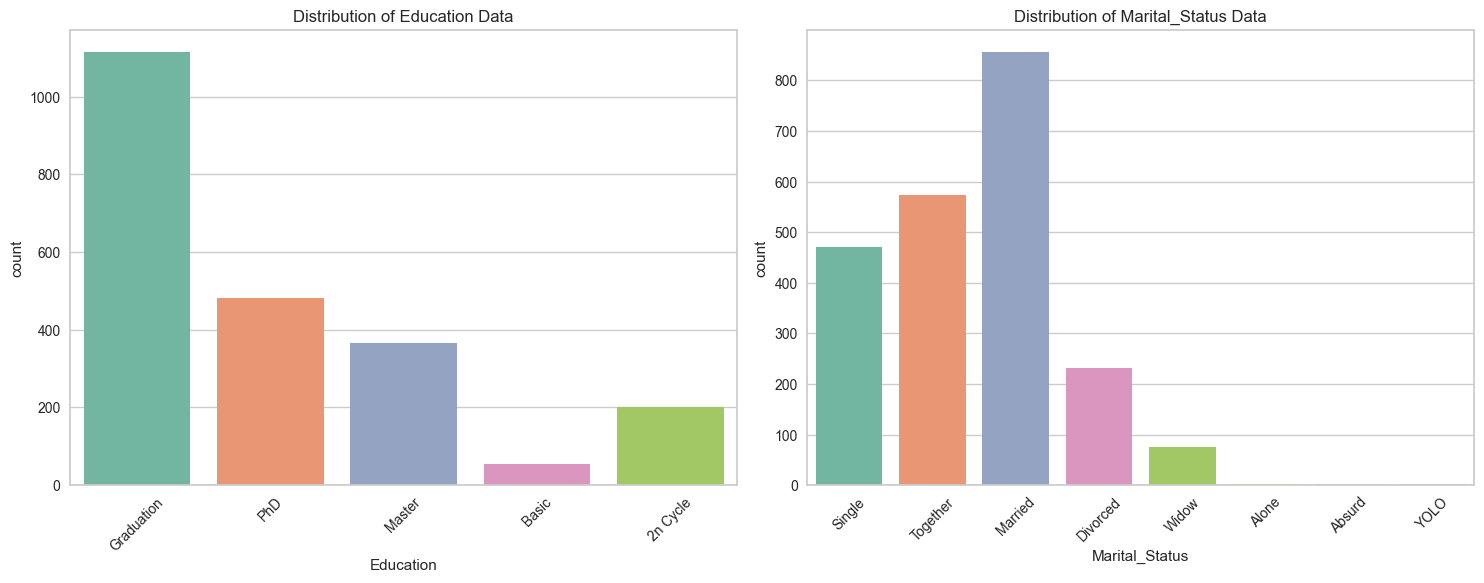

In [59]:
plt.figure(figsize=(15, 50))

for i, col in enumerate(cat_features, 1):  
    plt.subplot(9, 2, i)
    plt.title(f"Distribution of {col} Data")
    sns.countplot(x=col, data=df, palette='Set2') 
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


I can reduce the education categories before going to the model. Likewise, marial status has too many categories and I can merge them.

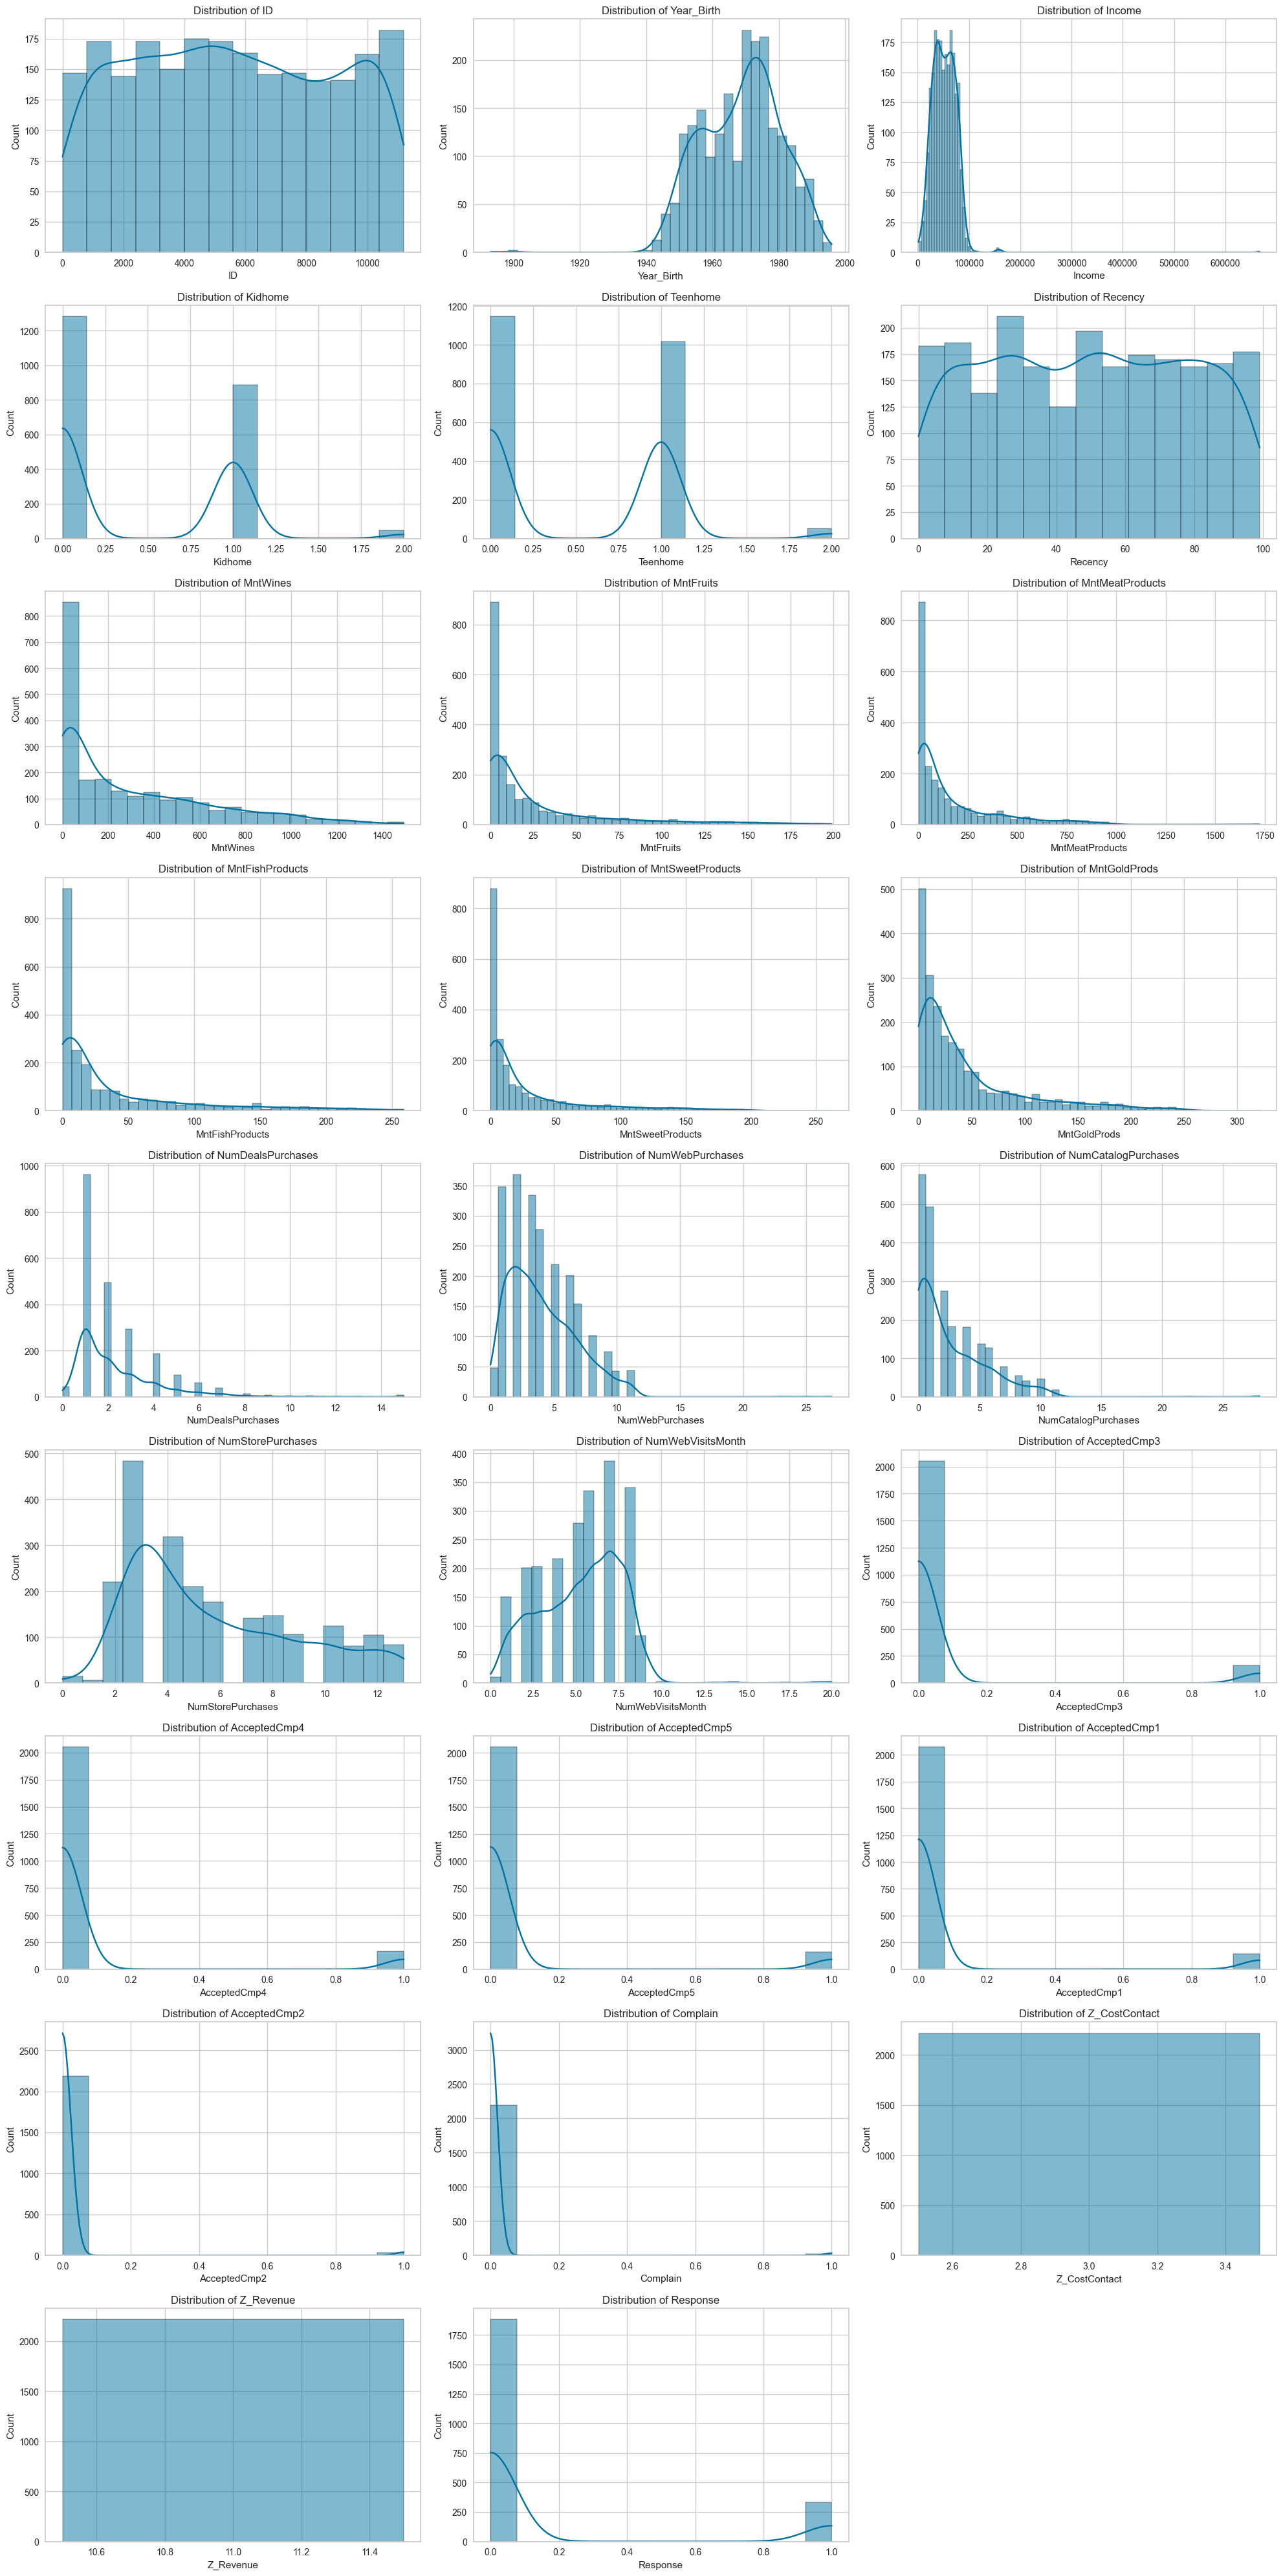

In [60]:
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(20,40))

num_vars = len(df_numeric.columns)

for i, var in enumerate(df_numeric.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

There are meaningless values, for example, there are individuals in the 120s at age. We will clean them without going to the model.

<a id="feature-engineering"></a>
# <font color= #FFFFFF> <b> Feature Engineering </b><font color= #FFFFFF>

In [61]:
df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
})


df["Living_With"] = df["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Absurd": "Alone",
    "Widow": "Alone",
    "YOLO": "Alone",
    "Divorced": "Alone",
    "Single": "Alone",
})

#We translate the year of birth into the age column for better perception by the model.
df["Age"] = 2021-df["Year_Birth"]
df = df.drop("Year_Birth", axis=1)

df = df[(df["Age"]<100)]

# total spend added
df['TotalSpending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

#Number of children added for strategies for children
df["Children"]=df["Kidhome"]+df["Teenhome"]

# Calculating household size
df['HouseholdSize'] =df["Living_With"].replace({"Alone": 1, "Partner":2})+ df['Kidhome'] + df['Teenhome']

#Dropping some of the redundant features
df = df.drop(["Z_CostContact", "Z_Revenue"], axis=1)

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [62]:
df = df.drop(["Marital_Status"], axis=1)

<a id="correlation"></a>
# <font color= #FFFFFF> <b> Correlation </b><font color= #FFFFFF>

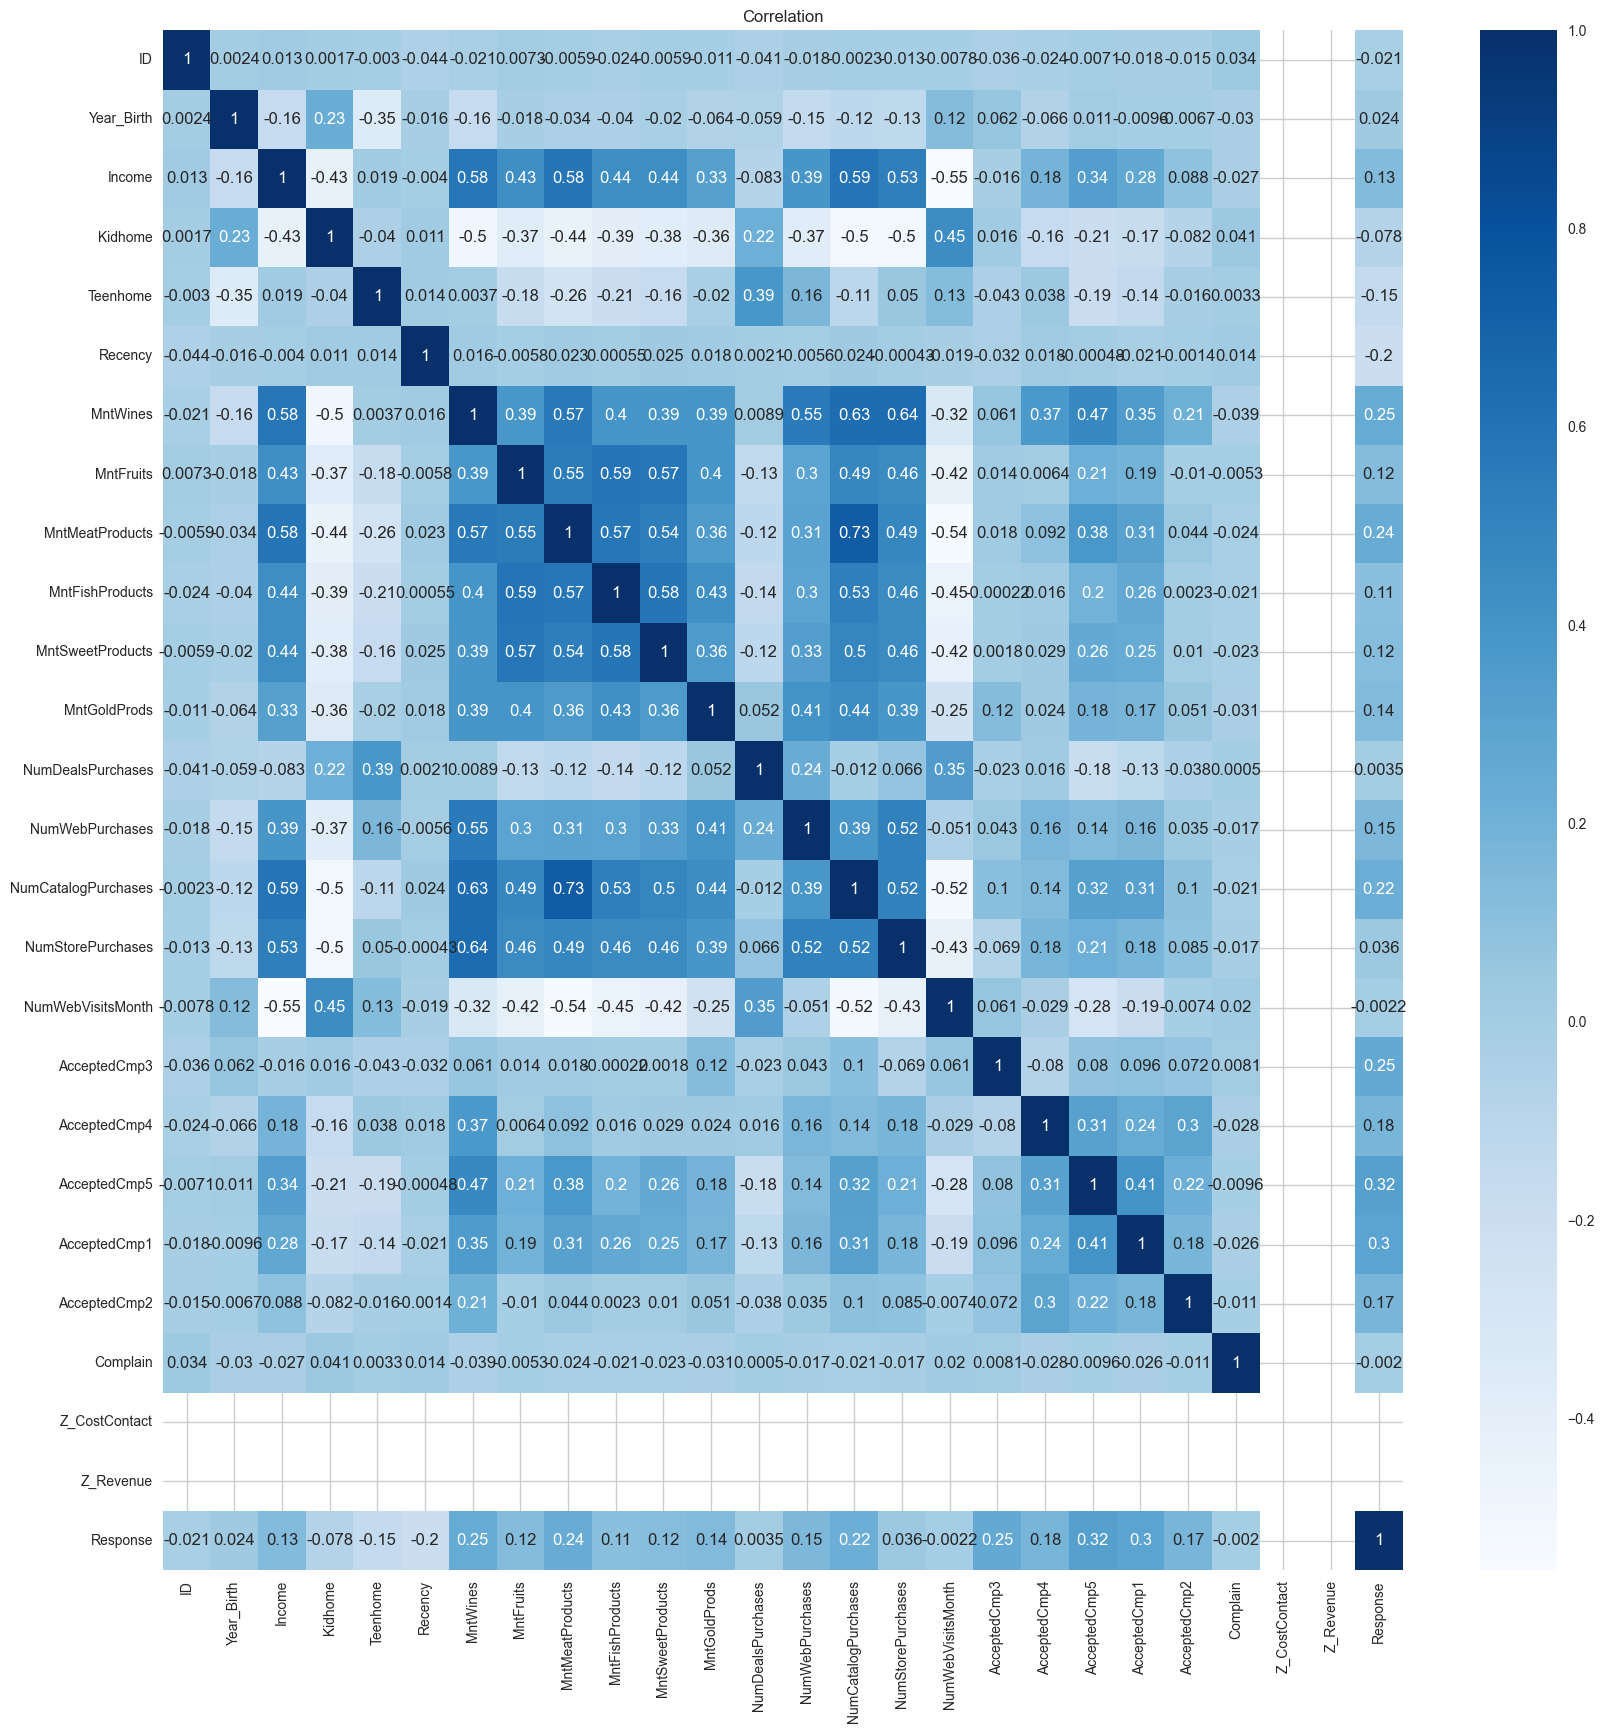

In [63]:
plt.figure(figsize=(20, 20))
sns.heatmap( df_numeric.corr(),annot=True, cmap="Blues")
plt.title("Correlation");

In [64]:
num_cols= df.select_dtypes('number').columns

skew_limit = 0.75               # define a limit above which we will log transform
skew_vals = df[num_cols].skew()


# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

Skew
Complain             10.382930
AcceptedCmp2          8.418817
Income                6.768708
AcceptedCmp1          3.559529
AcceptedCmp5          3.292187
AcceptedCmp3          3.266598
AcceptedCmp4          3.253966
TotalAcceptedCmp      2.725985
NumDealsPurchases     2.413607
MntFruits             2.104609
MntSweetProducts      2.103571
MntMeatProducts       2.028182
Response              1.956518
MntFishProducts       1.917273
NumCatalogPurchases   1.882222
MntGoldProds          1.838399
NumWebPurchases       1.195969
MntWines              1.171514
TotalSpending         0.857992

<a id="highest-spending"></a>
# Which product group had the highest spending?

Product Preferences: Investigating which products (wines, fruits, meat, etc.) are most popular among customers.

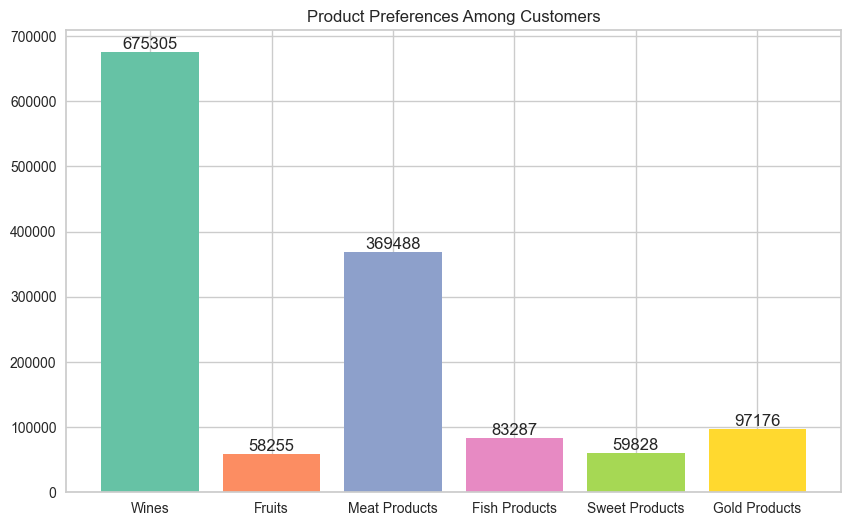

In [65]:
product_preferences = pd.DataFrame({
    'Wines': df['MntWines'].sum(),
    'Fruits': df['MntFruits'].sum(),
    'Meat Products': df['MntMeatProducts'].sum(),
    'Fish Products': df['MntFishProducts'].sum(),
    'Sweet Products': df['MntSweetProducts'].sum(),
    'Gold Products': df['MntGoldProds'].sum()
}, index=['Total'])


fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(product_preferences.columns, product_preferences.loc['Total'], color=sns.color_palette('Set2', n_colors=len(product_preferences.columns)))

ax.bar_label(bars)
plt.title('Product Preferences Among Customers', fontsize=12);


**Wines** are the most popular category with the highest sales. Special promotions, premium options, and loyalty programs should be developed to cater to this product category.

**Meat Products** are the second most popular category. Cross-selling opportunities can be created, and demand can be increased through targeted campaigns and discounts.

**Fish and Gold Products** show moderate demand. VIP campaigns or special discounts can be recommended for gold products, while fish products may need more promotional support to boost sales.

**Fruits and Sweet Products** are the least preferred categories. Cross-selling strategies and healthy lifestyle-themed campaigns could be applied to increase sales in these product groups.

In summary, wine and meat products are the main revenue drivers, while cross-selling, promotions, and campaigns can be leveraged to boost sales in other categories.

<a id="successful-campaigns"></a>
# Which campaigns were successful?

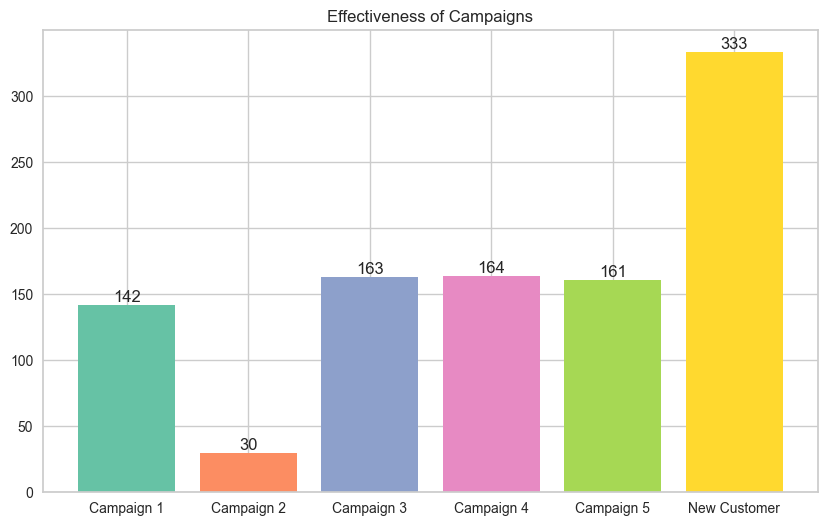

In [66]:
campaign_effectiveness = pd.DataFrame(
    {
        'Campaign 1': df['AcceptedCmp1'].sum(),
        'Campaign 2': df['AcceptedCmp2'].sum(),
        'Campaign 3': df['AcceptedCmp3'].sum(),
        'Campaign 4': df['AcceptedCmp4'].sum(),
        'Campaign 5': df['AcceptedCmp5'].sum(),
        'New Customer': df['Response'].sum(),
    },
    index=['Total'])

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(campaign_effectiveness.columns,
              campaign_effectiveness.loc['Total'],
              color=sns.color_palette('Set2',
                                      n_colors=len(
                                          campaign_effectiveness.columns)))

ax.bar_label(bars)
plt.title('Effectiveness of Campaigns', fontsize=12)
plt.show()

**Campaign 1** was moderately successful, attracting 142 customers. While it garnered some attention, there is potential for improvement.

**Campaign 2** was the least effective, drawing only 30 customers. This suggests that either the campaign's message did not resonate with the audience or there were issues with its promotion.

**Campaigns 3, 4, and 5** showed similar effectiveness, each attracting around 160 customers. These campaigns performed better than Campaign 1 and significantly better than Campaign 2. They can be considered relatively successful, but there is still room for optimization.

**New Customer** Acquisition was by far the most effective strategy, attracting 333 customers. This indicates that efforts to attract new customers, possibly through a combination of various campaigns or promotions, have been highly successful.

<a id="spending-patterns-household-size"></a>
# How do spending patterns vary by household size?

Text(0.5, 0, 'Household Size')

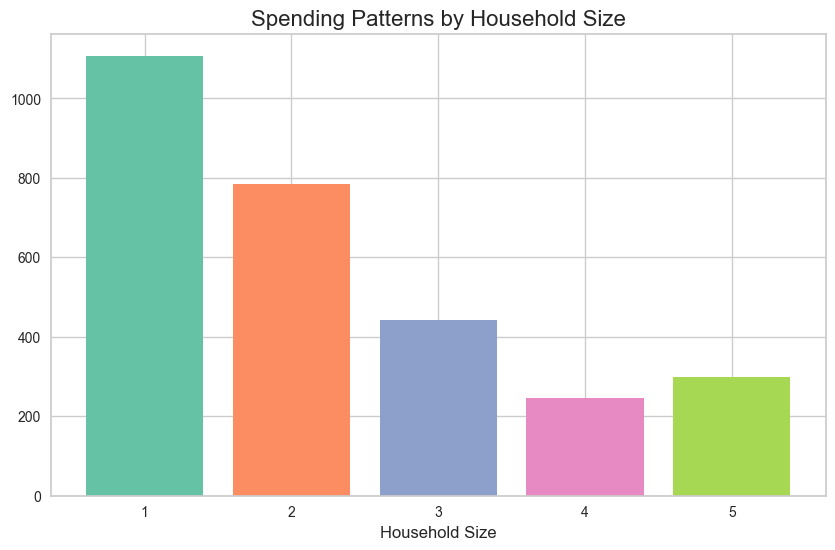

In [67]:
spending_by_household = df.groupby('HouseholdSize')['TotalSpending'].mean()

plt.figure(figsize=(10, 6))
plt.bar(spending_by_household.index,
        spending_by_household.values,
        color=sns.color_palette('Set2',
                                n_colors=len(campaign_effectiveness.columns)))

plt.title('Spending Patterns by Household Size', fontsize=16)
plt.xlabel('Household Size', fontsize=12)

**1-Person Households:** Given their high spending potential, this customer group can be targeted with luxury products, single-person campaigns, and premium services. Personalized marketing strategies could help increase spending in this group.

**2-3 Person Households:** Strategies for this group should target those who make moderate purchases, meeting family-related needs. Offers such as dual or family-focused campaigns (e.g., discounts on second items, family-sized packages) could help boost spending in this segment.

**4-5 Person Households:** For this lower-spending group, economic and bulk purchase-oriented campaigns could be more effective. Offers on bulk items, discounts on family essentials, and multi-item promotions could encourage spending. Additionally, campaigns focused on family members with multiple products could capture the interest of this segment.

<a id="education-levels-impact"></a>
# How do education levels impact spending?

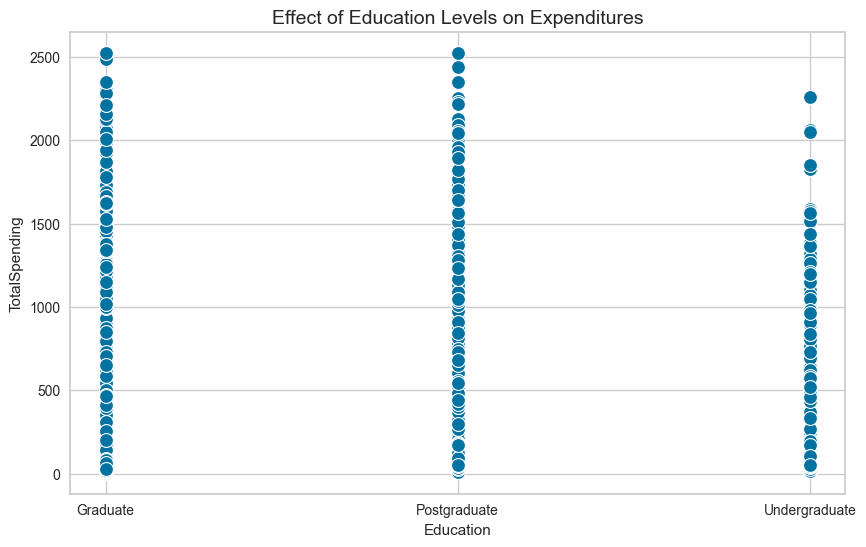

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Education', y='TotalSpending', data=df, palette='Set2', s=100)

plt.title('Effect of Education Levels on Expenditures', fontsize=14);

<a id="categories-expenditure-education"></a>
## What are the categories of expenditure by education level?

In [69]:
spending_by_education = df.groupby('Education').agg({
    'MntWines': 'mean',
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean'
})

fig = px.bar(
    spending_by_education.reset_index(),
    x='Education',
    y=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    barmode='group',
    labels={'value': 'Average Spending', 'variable': 'Spending Category'},
    title="Expenditure Categories by Education Level"
)
fig.show()


**Postgraduate customers** spend the most on wine and meat products. Their preference for premium products is evident.

**Graduate customers** also spend significantly on wine and meat products, but slightly less than the postgraduate group.

**Undergraduate customers** are also interested in wine and meat products, but their spending is lower compared to the other g

<a id="relationship-income-expenditure"></a>
# What is the relationship between income level and expenditure?

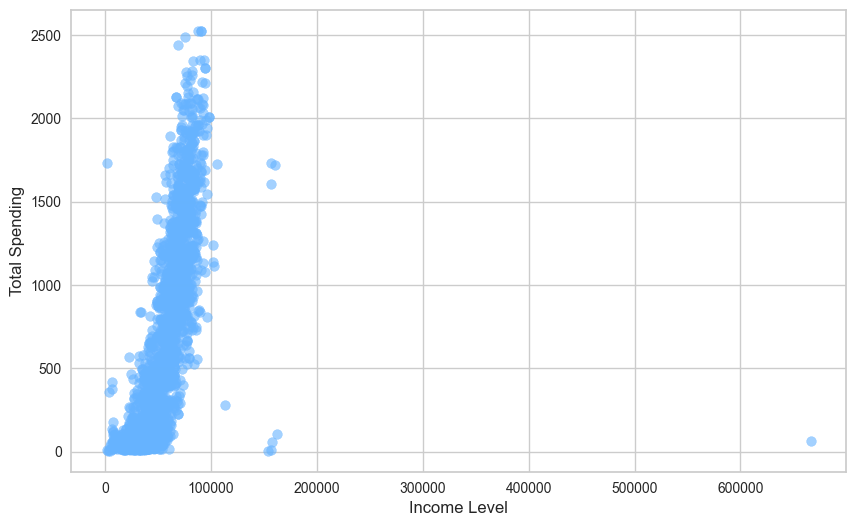

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['TotalSpending'], color='#66B3FF', alpha=0.6)
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Total Spending', fontsize=12);

In [71]:
# Delete because there is only one value greater than 600000
df = df[(df["Income"]<600000)]

<a id="most-used-type-purchase"></a>
# What is the most used type of purchase?

In [72]:
df.head()

ID     Education   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response Living_With  Age  TotalSpending  Children  HouseholdSize  TotalAcceptedCmp  NumTotalPurchases
0  5524      Graduate  58138.0        0         0  2012-09-04       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1       Alone   64           1617         0              1                 0                 25
1  2174      Graduate  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0       Alone   67             27         2              3                 0                  6
2  4141      Graduate  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0     Partner   56            776         0              2                 0                 21
3  6182      Graduate  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0     Partner   37             53         1              3                 0                  8
4  5324  Postgraduate  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0     Partner   40            422         1              3                 0                 19

Most common type of purchase: Store Purchases (12844 quantity)


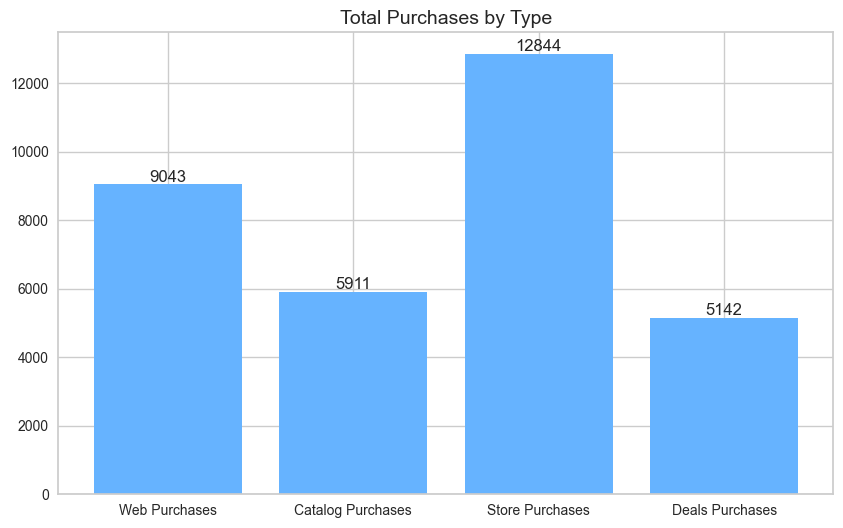

In [73]:
purchase_totals = {
    'Web Purchases': df['NumWebPurchases'].sum(),
    'Catalog Purchases': df['NumCatalogPurchases'].sum(),
    'Store Purchases': df['NumStorePurchases'].sum(),
    'Deals Purchases': df['NumDealsPurchases'].sum()
}

most_common_purchase = max(purchase_totals, key=purchase_totals.get)
print(f"Most common type of purchase: {most_common_purchase} ({purchase_totals[most_common_purchase]} quantity)")

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(purchase_totals.keys(), purchase_totals.values(), color='#66B3FF')
ax.bar_label(bars)

plt.title('Total Purchases by Type', fontsize=14);

Customers prefer in-store shopping the most (12,844 transactions), followed by web purchases (9,043 transactions). Catalog purchases (5,911 transactions) and deals purchases (5,142 transactions) are less popular but still hold a significant place. Overall, while physical stores remain the most preferred shopping channel, online purchases also account for a substantial share.

<a id="customers-register-month"></a>
# How many customers register each month ?

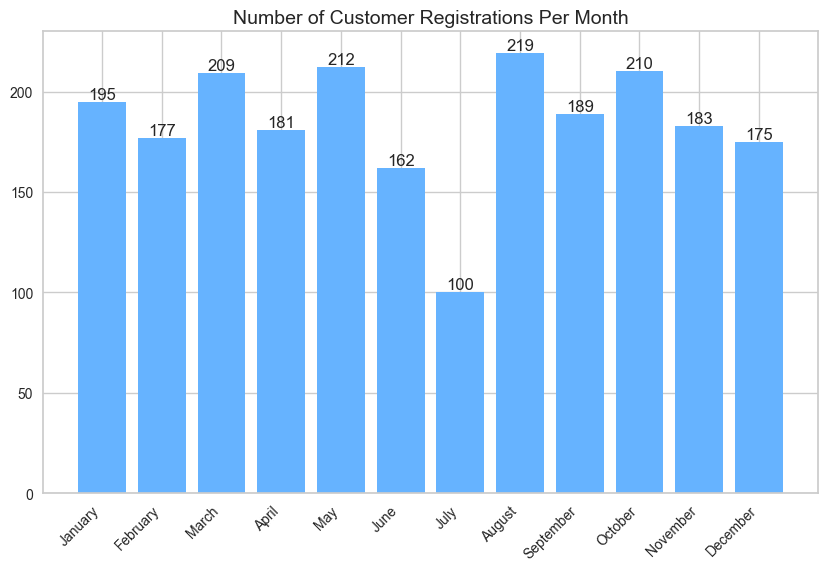

In [74]:
df['Month'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').dt.month
monthly_registrations = df['Month'].value_counts().sort_index()
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_registrations.index = month_names

# Visualizing the results with a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(monthly_registrations.index, monthly_registrations.values, color='#66B3FF')

ax.bar_label(bars)
plt.title('Number of Customer Registrations Per Month', fontsize=14)
plt.xticks(rotation=45, ha='right');


In general, there is a decrease in client registrations at the beginning of the summer months, but it increases again in the fall (August and September).

In [75]:
df.drop('Month', inplace=True, axis=1)

<a id="data-preprocessing"></a>
# <font color= #FFFFFF> <b> Data Preprocessing</b><font color= #FFFFFF>

In this section, I will be preprocessing the data to perform clustering operations.

In [76]:
df1 = df.copy()

df1 = df1.drop([
    'Dt_Customer', 'ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Kidhome',
    'Teenhome', 'Dt_Customer'
],
               axis=1)

In [77]:
#Encoding
columns_to_encode = df1[['Education','Living_With']]
encoder = LabelEncoder()
for column in columns_to_encode:
    df1[column] = encoder.fit_transform(df1[column])
df1.head()

Education   Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Living_With  Age  TotalSpending  Children  HouseholdSize  TotalAcceptedCmp  NumTotalPurchases
0          0  58138.0       58       635         88              546              172                88            88                  3                8                   10                  4                  7            0   64           1617         0              1                 0                 25
1          0  46344.0       38        11          1                6                2                 1             6                  2                1                    1                  2                  5            0   67             27         2              3                 0                  6
2          0  71613.0       26       426         49              127              111                21            42                  1                8                    2                 10                  4            1   56            776         0              2                 0                 21
3          0  26646.0       26        11          4               20               10                 3             5                  2                2                    0                  4                  6            1   37             53         1              3                 0                  8
4          1  58293.0       94       173         43              118               46                27            15                  5                5                    3                  6                  5            1   40            422         1              3                 0                 19

In [78]:
# Scaling 
scaler = StandardScaler()
scaler.fit(df1)
df1 = pd.DataFrame(scaler.transform(df1),columns= df1.columns )

<a id="dimensionality-reduction"></a>
# <font color= #FFFFFF> <b>Dimensionality Reduction</b><font color= #FFFFFF>

There are many different options for dimensionality reduction, which are based on different methods, for example:

- Principal component analysis (PCA)
- Uniform Manifold Approximation and Projection (UMAP)
- t-distributed Stochastic Neighbor Embedding (t-SNE)
- Locally-Linear Embedding (LLE)
- Multidimensional Scaling (MDS)

The most commonly used dimensionality reduction algorithm is PCA, and we also use it in this work.

## PCA

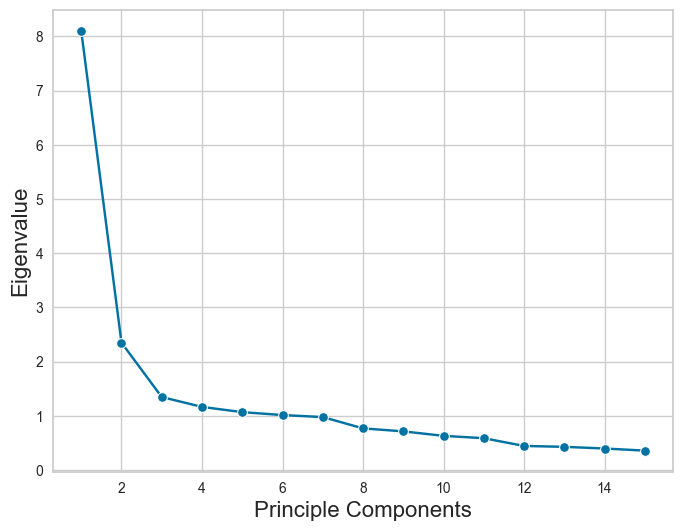

In [79]:
import prince
pca = prince.PCA(n_components=15, n_iter=10, rescale_with_mean=False,
rescale_with_std=False, copy=True, check_input=True,
engine= "sklearn" , random_state=42)

pca = pca.fit(df1)
eigeanvalues = pca.eigenvalues_


ev = pd.DataFrame()
ev["pca"] = range(1,16)
ev["eigenvalue"]=pd.DataFrame(pca.eigenvalues_)
plt.figure(figsize=(8,6))
sns.lineplot(x="pca", y = "eigenvalue", marker = "o", data= ev)
plt.ylabel("Eigenvalue", fontsize=16)
plt.xlabel("Principle Components", fontsize=16)
plt.show()

At this stage, what concerns us in terms of clustering is how many of the principal components calculated by PCA explain most of the event under investigation. In other words, how many of the calculated principal components are sufficient for meaningful clustering? 

For this, the eigen values of the principal components or the principal components to the left of the inflection point of the variance graph are selected.

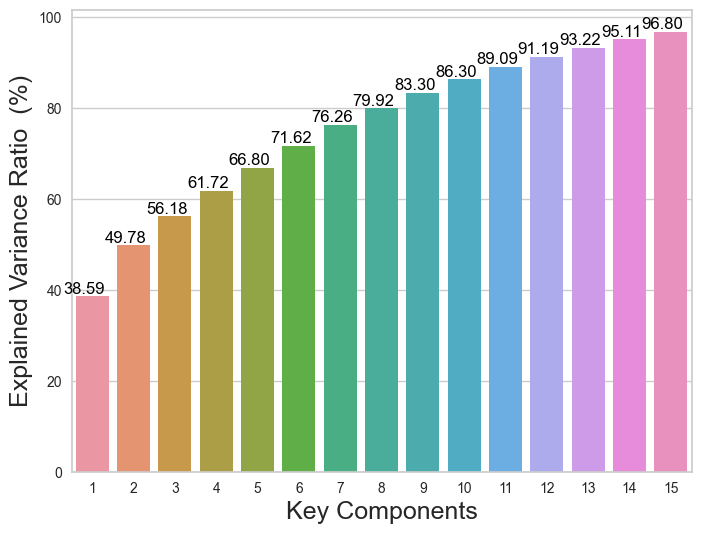

In [80]:
# avo: Explained variance ratio (cumulative)
# Rule of thumb How many principal components explain at least 80% variance?

avo = pd.DataFrame()
avo["pca"] = range(1,16)
avo["vari"] = pd.DataFrame(pca.cumulative_percentage_of_variance_)

plt.figure(figsize=(8,6))
graph = sns.barplot(x="pca", y ="vari", data=avo)

for p in graph.patches :
    graph.annotate('{:.2f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()), ha="center", va="bottom", color="black")

plt.ylabel("Explained Variance Ratio  (%)", fontsize=18)
plt.xlabel("Key Components", fontsize=18)
plt.show()  

It is possible to choose 2-3 components as the minimum number of components, because this is where the knee-jerk point occurs.
In terms of optimal balance, choosing the first 7-8 components will explain most of the data set (around 83%).

As a rule of thumb, 80% or more explained variance can be considered as a threshold. I set it as 8.

In [81]:
# automatically finds the first PCA count with variance above 0.8
pca = decomposition.PCA(0.8)
pca.fit(df1)
x_pca = pd.DataFrame(
    pca.transform(df1), columns=[f"PC{i}" for i in range(2, pca.n_components_ + 2)]
)
pca.n_components_, pca.explained_variance_ratio_.sum()

(9, 0.8330263889828323)

Since there is very little difference between clustering 8 and 9, I will take my cluster number as 8. I don't want my cluster number to increase too much.

In [82]:
# Recreating the PCA model with 8 components
pca = PCA(n_components=8)
X_pca = pca.fit_transform(df1)
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(8)])
df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8
0  4.616070 -0.380546 -1.615321 -1.715333  0.495826  0.294190 -0.107406  0.493488
1 -2.781071 -0.369441 -0.084310 -0.186214  2.078620 -0.283868 -1.228217 -0.670952
2  2.107168 -0.093406  0.244065 -0.556710 -0.100035 -0.660520 -0.936101  1.251570
3 -2.725298 -0.645056  0.543653 -0.384458 -1.103879  0.387981 -1.020423 -0.196354
4 -0.152015  1.005895  0.405820 -0.761244 -0.583227  0.618920  1.798306 -0.768539

<a id="hierarchical-clustering"></a>
# <font color= #FFFFFF> <b> Hierarchical Clustering </b><font color= #FFFFFF>

First we will make some evaluations with clustering to find my cluster numbers. Then we will create RFM with pca and segment the data. Thus, we will analyze our customers in detail. 

In [83]:
#I will continue with the first 3 components for Hierarchical and Cluster.
dfK = df_pca[['PC1', 'PC2', 'PC3']] 

In [84]:
from sklearn.neighbors import BallTree 
def hopkins(data_frame, sampling_size):
   
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


In [85]:
# Below 0.30 says that it can be a good clustering
hopkins( dfK, dfK.shape[0]) 

0.12502375527747578

The closer the Hopkins score is to 0, the more suitable our dataset is for clustering. The closer it is to 0, the more segregation and grouping occurs. This value is a very good value for us.

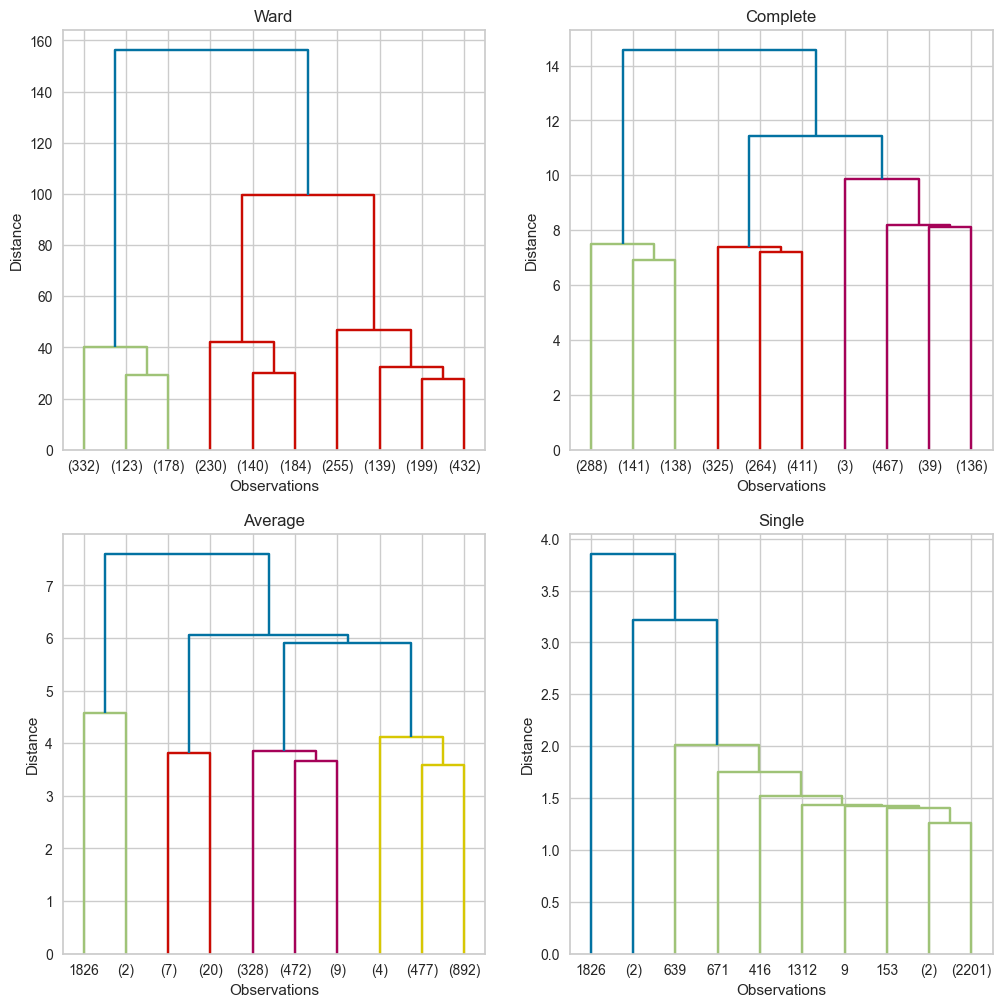

In [86]:
## Dendrogram Draw  we will try each method and find the optimum value of k
hc_ward = linkage(y = dfK, method = "ward") 
hc_complete = linkage(dfK, "complete") 
hc_average = linkage(dfK, "average") 
hc_single = linkage(dfK, "single")

plt.figure(figsize = (12,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [87]:
# Silhouette Score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(dfK)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(dfK, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4333961878332765
For n_clusters=3, the silhouette score is 0.3934848785622869
For n_clusters=4, the silhouette score is 0.31853398606102856
For n_clusters=5, the silhouette score is 0.3131928417847827
For n_clusters=6, the silhouette score is 0.2717732940744446
For n_clusters=7, the silhouette score is 0.2669895551516177
For n_clusters=8, the silhouette score is 0.26717136342548675
For n_clusters=9, the silhouette score is 0.27495737391568903
For n_clusters=10, the silhouette score is 0.2783154820350825


Silhouette score 3 gave the optimum k value. A silhouette score of 0.5 and above is preferred.

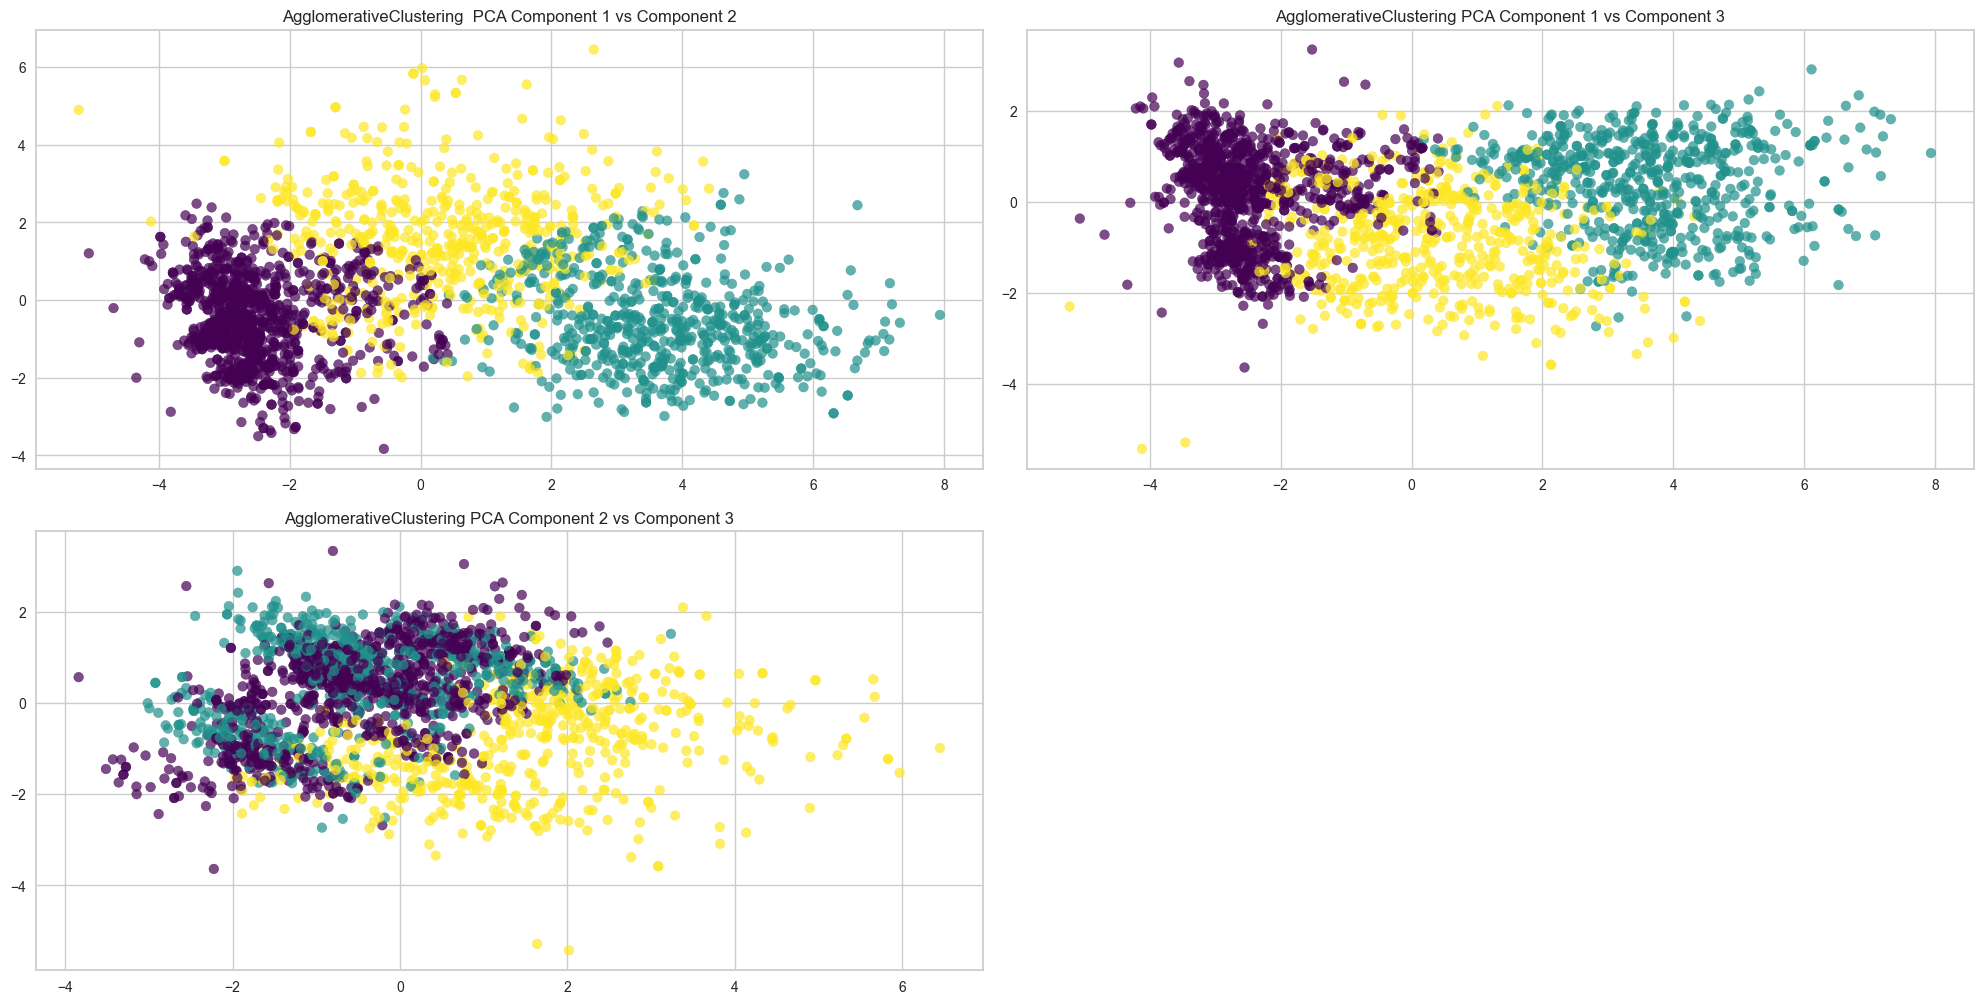

In [88]:
#model building
Agg1 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(dfK)
dfK['cluster_Agg'] = y_agg


plt.figure(figsize=(20, 20))

# subplot 1: PC1 vs PC2
plt.subplot(421)
plt.scatter(dfK["PC1"], dfK["PC2"], c=dfK.cluster_Agg, cmap="viridis", alpha=0.7)
plt.title('AgglomerativeClustering  PCA Component 1 vs Component 2')

# subplot 2: PC1 vs PC3
plt.subplot(422)
plt.scatter(dfK["PC1"], dfK["PC3"], c=dfK.cluster_Agg, cmap="viridis", alpha=0.7)
plt.title('AgglomerativeClustering PCA Component 1 vs Component 3')

# subplot 3: PC2 vs PC3
plt.subplot(423)
plt.scatter(dfK["PC2"], dfK["PC3"], c=dfK.cluster_Agg, cmap="viridis", alpha=0.7)
plt.title('AgglomerativeClustering PCA Component 2 vs Component 3')

plt.tight_layout()
plt.show()


In general, Component 1 stands out as the strongest discriminator in this clustering analysis after dimensionality reduction with PCA. Other components may be weaker in separating the differences between the data.

<a id="kmeans-clustering"></a>
# <font color= #FFFFFF> <b> KMeans Clustering </b><font color= #FFFFFF>

elbow:
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

yellowbrick library
https://www.scikit-yb.org/en/latest/

The Hopkins test is a statistical test used to measure the clustering tendency of a data set. This test helps to determine how well the data set lends itself to clustering or how randomly distributed the samples in the data set are. 

In [89]:
dfK = df_pca[['PC1', 'PC2', 'PC3']]

In [90]:
# Below 0.30 says that it can be a good clustering
hopkins( dfK, dfK.shape[0]) 

0.12483928708637941

The closer the Hopkins score is to 0, the more suitable our dataset is for clustering. The closer it is to 0, the more segregation and grouping occurs. This value is a very good value for us.

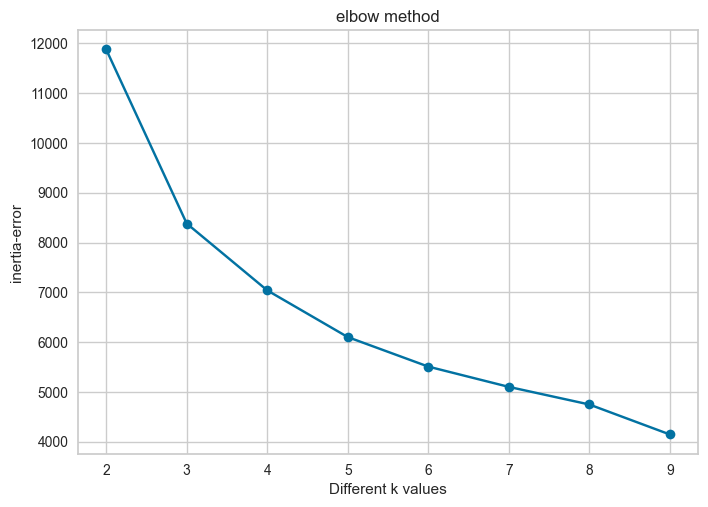

In [91]:
# Elbow metod
ssd = []  
K = range(2,10) 
for k in K:                                         
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(dfK)
    ssd.append(model.inertia_)
    
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")
plt.show()

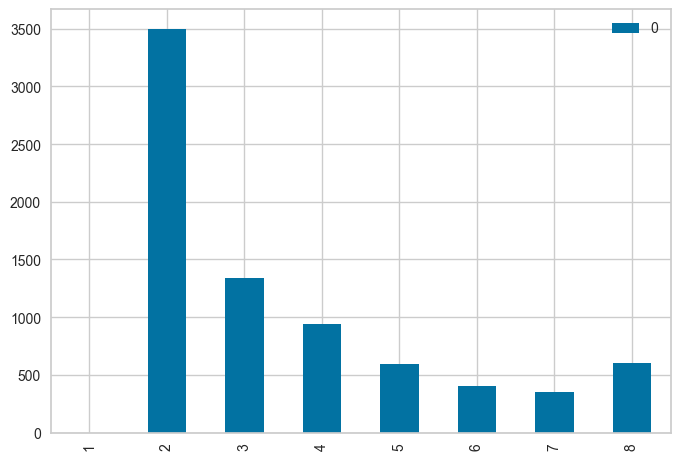

In [92]:
# Let's see the hardest drop point according to the bottom chart
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff.plot(kind='bar');

K 3 is the elbow point and according to the bar chart, it seems to be the sharpest decline.

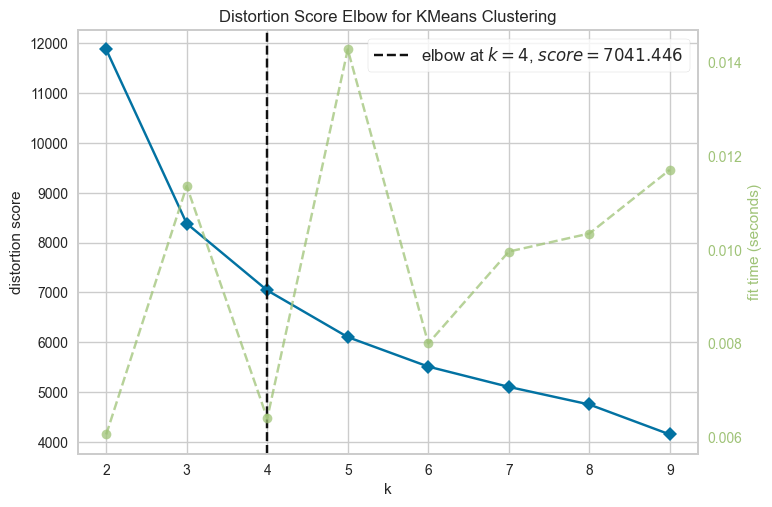

In [93]:
# Yellowbrick (n_cluster selection)
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) 
visualizer.fit(dfK)  
visualizer.show();

In [94]:
# Silhouette analysis

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(dfK)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(dfK, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4760498041129571
For n_clusters=3, the silhouette score is 0.4136074488819952
For n_clusters=4, the silhouette score is 0.3488411015873922
For n_clusters=5, the silhouette score is 0.3225508074996545
For n_clusters=6, the silhouette score is 0.3238366377713897
For n_clusters=7, the silhouette score is 0.3001554494545317
For n_clusters=8, the silhouette score is 0.29963427869494463


Here, too, we found the optimum k value to be 3.

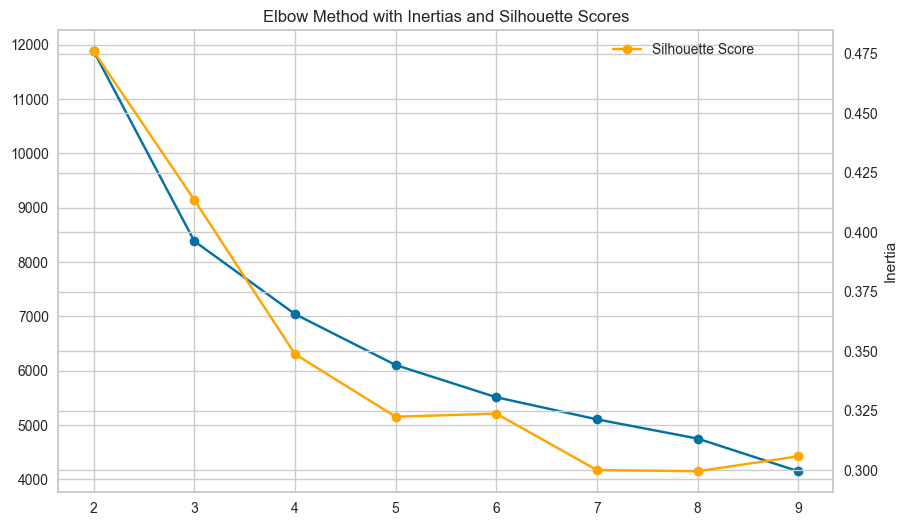

In [95]:
# Graph showing Elbow and Silhoutee score together
inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(dfK)
    silhouette = silhouette_score(dfK, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

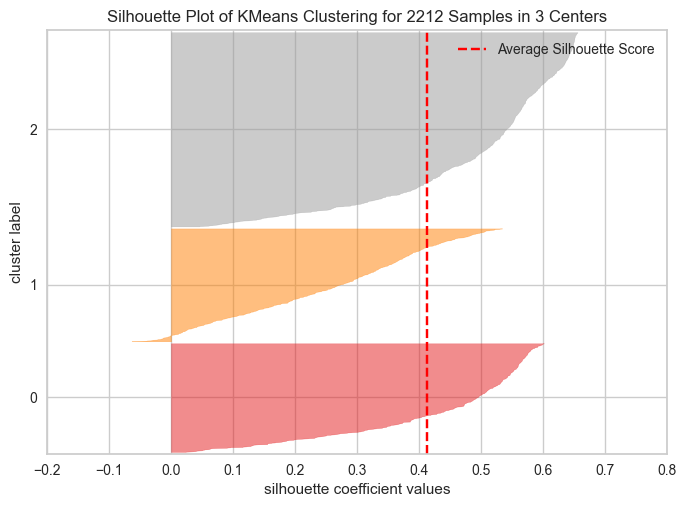

In [96]:
# Silhouette Visualizer
model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(dfK)    # Fit the data to the visualizer
visualizer.poof();

The average silhouette score is shown by the red dashed line in the graph. This line shows that the overall performance is reasonable with a silhouette score of around 0.4.

A positive average score indicates that overall clustering is acceptable, but some clusters may be too close together.

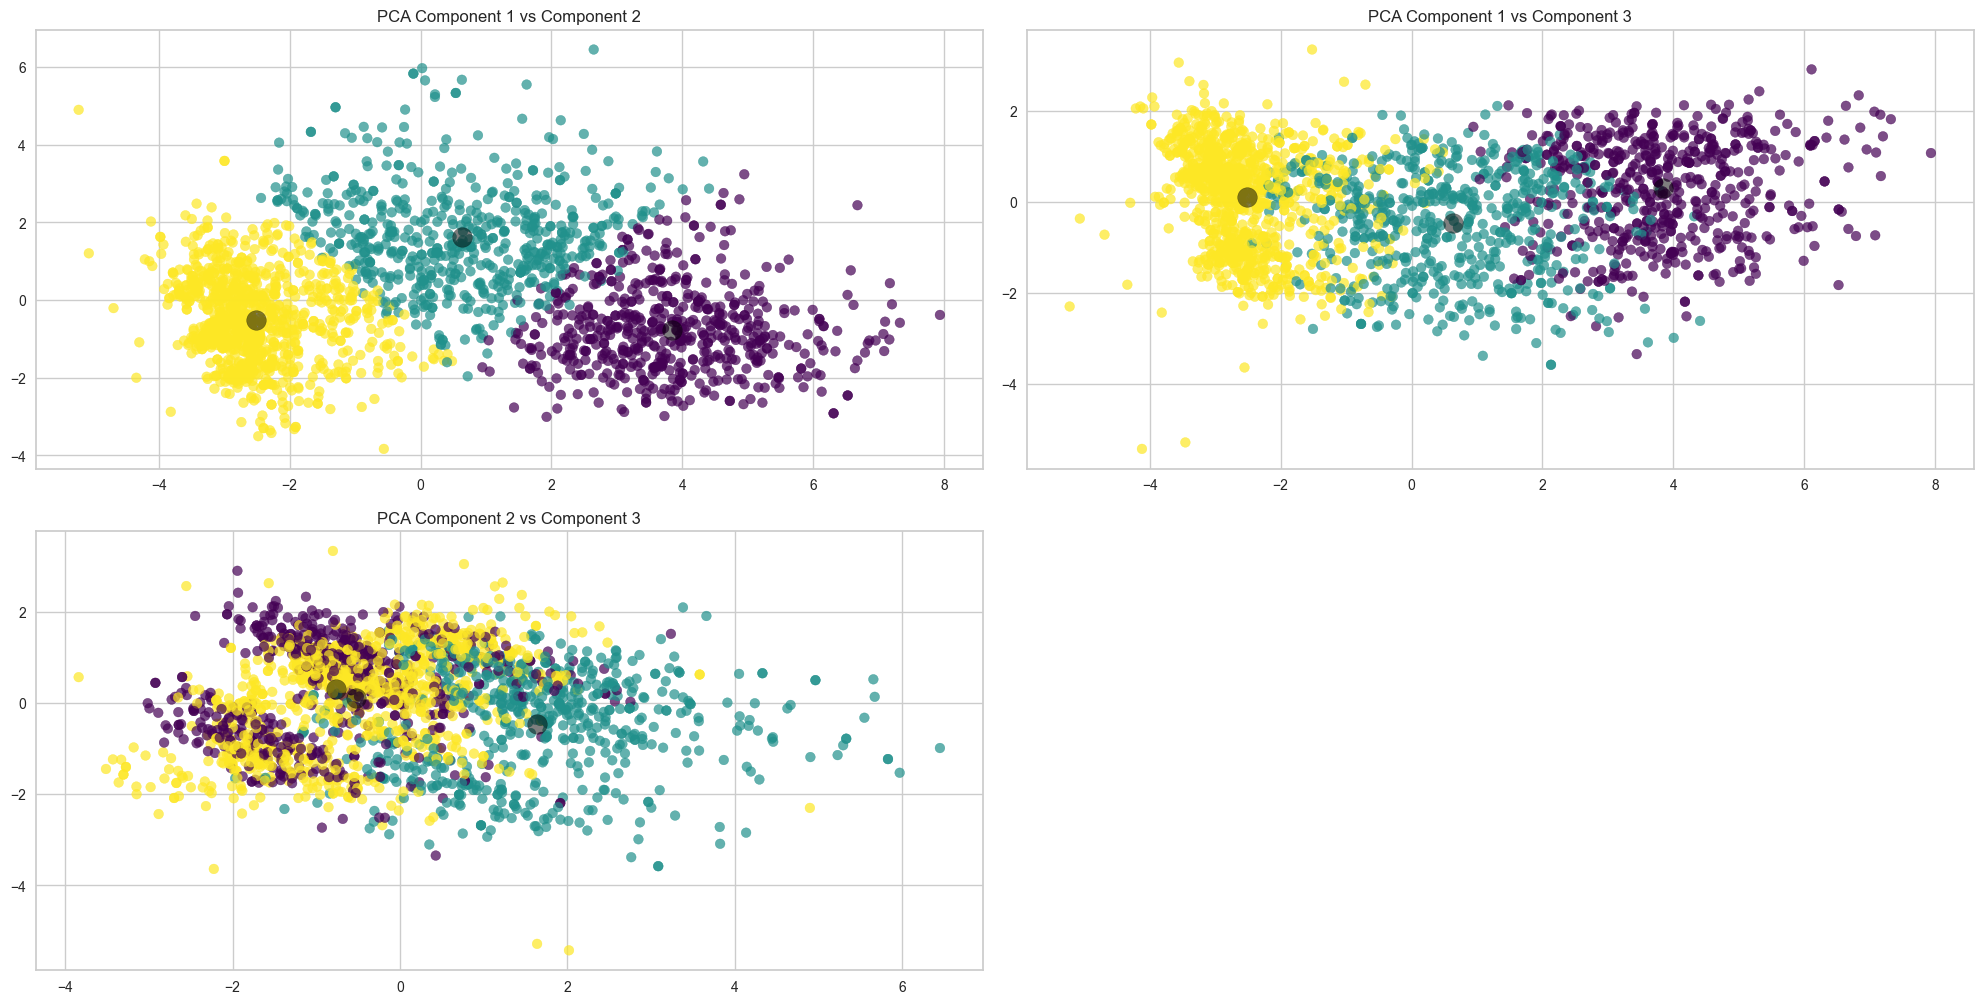

In [97]:
# According to my silhouette scorum yellow brick result, I determined my optimum K value as 3. 
#Now I can continue with K=3 with peace of mind.  

# model building

model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(dfK)
cluster = model.labels_ 
dfK["predicted_clusters"] = cluster


centers = model.cluster_centers_
plt.figure(figsize=(20, 20))

# subplot 1: PC1 vs PC2
plt.subplot(421)
plt.scatter(dfK["PC1"], dfK["PC2"], c=dfK.predicted_clusters, cmap="viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('PCA Component 1 vs Component 2')

# subplot 2: PC1 vs PC3
plt.subplot(422)
plt.scatter(dfK["PC1"], dfK["PC3"], c=dfK.predicted_clusters, cmap="viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5)
plt.title('PCA Component 1 vs Component 3')

# subplot 3: PC2 vs PC3
plt.subplot(423)
plt.scatter(dfK["PC2"], dfK["PC3"], c=dfK.predicted_clusters, cmap="viridis", alpha=0.7)
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)
plt.title('PCA Component 2 vs Component 3')

plt.tight_layout()
plt.show()


Hierarchical Clustering grafic
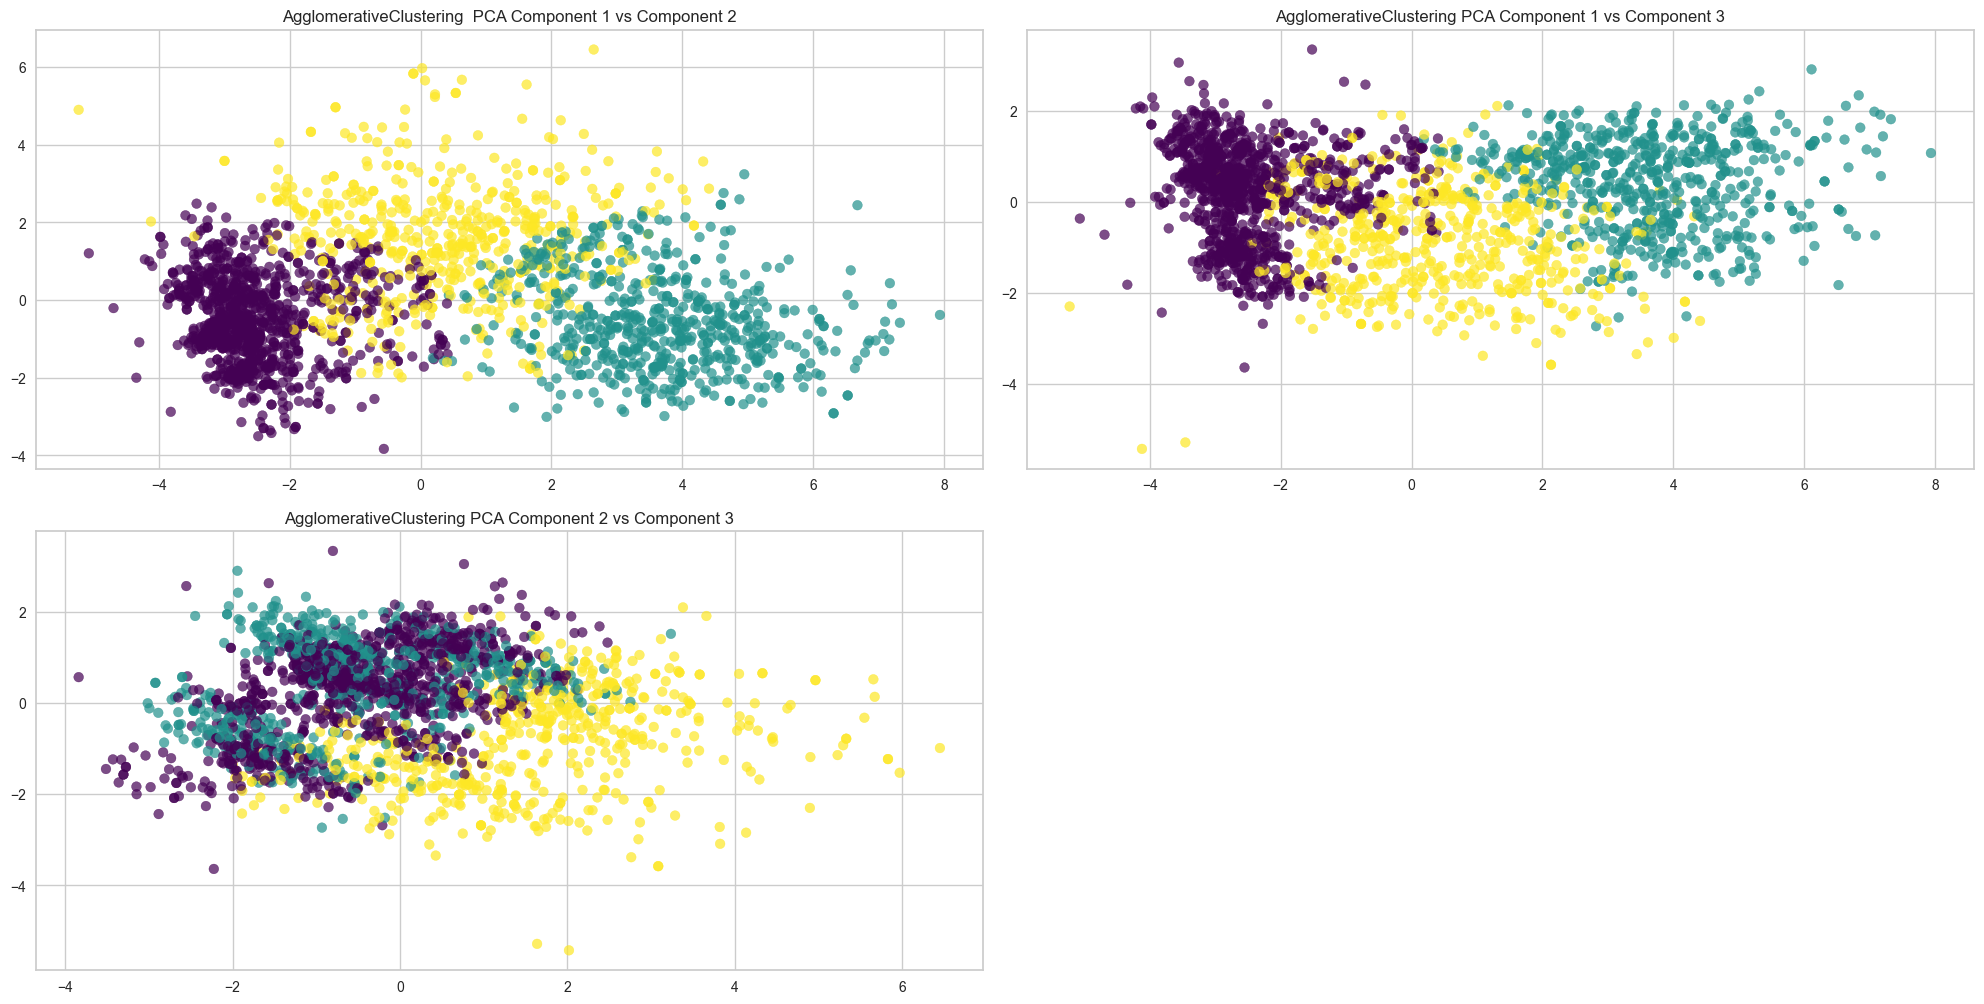

KMeans did the best clustering. So we continue to move forward with KMeans. 

<IPython.core.display.Javascript object>


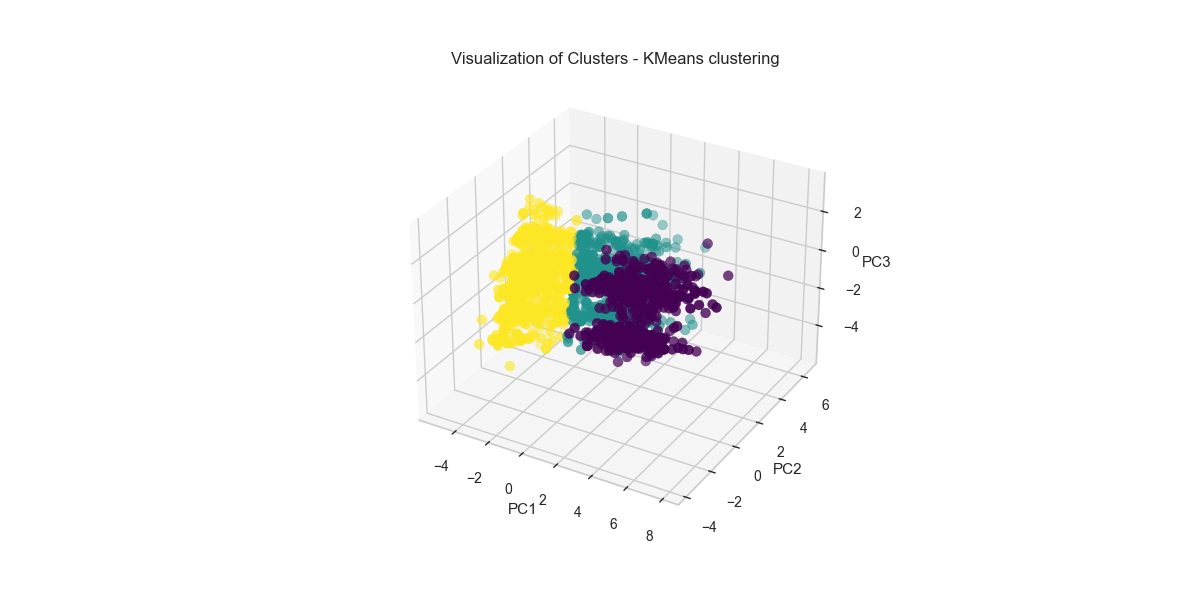

In [98]:
%matplotlib notebook

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    xs=dfK.iloc[:, 0],
    ys=dfK.iloc[:, 1],
    zs=dfK.iloc[:, 2],
    marker="o",
    c=dfK.predicted_clusters,
    s=50,
    cmap="viridis",
)
ax.set(
    xlabel="PC1",
    ylabel="PC2",
    zlabel="PC3",
    title="Visualization of Clusters - KMeans clustering",
)
plt.show()


**We found the optimum number of clusters to be 3, but it is not enough for our company's expectations and for the comprehensive strategies we want to develop. Based on our best practice experience, we will create more detailed clusters with PCA clustering method. So we can apply personalized strategies.**

<a id="rfm"></a>
# <font color= #FFFFFF> <b> Recency, Frequency, Monetary Value (RFM) </b><font color= #FFFFFF>

**What Is Recency, Frequency, Monetary Value (RFM)?**
- Recency, frequency, monetary value (RFM) is a model used in marketing analysis that segments a company’s consumer base by their purchasing patterns or habits. In particular, it evaluates customers’ recency (how long ago they made a purchase), frequency (how often they make purchases), and monetary value (how much money they spend).

- Recency, frequency, monetary value (RFM) is a marketing analysis tool used to identify a firm’s best clients based on the nature of their spending habits.
- An RFM analysis evaluates clients and customers by scoring them in three categories: how recently they’ve made a purchase, how often they buy, and the size of their purchases.
- The RFM model assigns a score of 1 to 5 (from worst to best) for customers in each of the three categories.
- RFM analysis helps firms reasonably predict which customers are likely to purchase their products again, how much revenue comes from new (vs. repeat) clients, and how to turn occasional buyers into habitual ones.

The RFM model is based on three quantitative factors:

**Recency:** How recently a customer has made a purchase.The more recently a customer has made a purchase with a company, the more likely they will continue to keep the business and brand in mind for subsequent purchases.

**Frequency:** How often a customer makes a purchase.  If the purchase cycle can be predicted—for example, when a customer needs to buy more groceries—marketing efforts may be directed toward reminding them to visit the business when staple items run low.

**Monetary value:** How much money a customer spends on purchases. While this can produce a better return on investment (ROI) in marketing and customer service, it also runs the risk of alienating customers who have been consistent but may not spend as much with each transaction.

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The “best” customer would receive a top score in every category.

In [99]:
# Step 1: Calculate RFM values for each customer

recency = df['Recency']

frequency = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df[
    'NumStorePurchases'] + df['NumDealsPurchases']

monetary = df['TotalSpending']

rfm_df = pd.DataFrame({
    'CustomerID': df['ID'],
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

# Step 2: Assign ranks for Recency, Frequency, and Monetary

rfm_df['R_rank'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_rank'] = pd.qcut(rfm_df['Frequency'].rank(method='first'),
                           5,
                           labels=[1, 2, 3, 4, 5])
rfm_df['M_rank'] = pd.qcut(rfm_df['Monetary'].rank(method='first'),
                           5,
                           labels=[1, 2, 3, 4, 5])

# Step 3: Calculate the final RFM score
rfm_df['RFM_Score'] = rfm_df['R_rank'].astype(str) + rfm_df['F_rank'].astype(
    str) + rfm_df['M_rank'].astype(str)

rfm_df.head()

CustomerID  Recency  Frequency  Monetary R_rank F_rank M_rank RFM_Score
0        5524       58         25      1617      3      5      5       355
1        2174       38          6        27      4      1      1       411
2        4141       26         21       776      4      4      4       444
3        6182       26          8        53      4      2      1       421
4        5324       94         19       422      1      4      3       143

In [100]:
# Step 4: Segment the customers based on RFM values
def assign_rfm_segment(row):
    # Champions
    if int(row['R_rank']) == 5 and int(row['F_rank']) == 5:
        return 'Champions'
    # Loyal Customers
    elif int(row['R_rank']) >= 4 and int(row['F_rank']) >= 4:
        return 'Loyal Customers'
    # Potential Loyalists
    elif int(row['R_rank']) >= 4 and int(row['F_rank']) == 3:
        return 'Potential Loyalists'
    # New Customers
    elif int(row['R_rank']) == 5 and int(row['F_rank']) == 1:
        return 'New Customers'
    # At Risk
    elif int(row['R_rank']) == 2 and int(row['F_rank']) >= 4:
        return 'At Risk'
    # Can't Lose
    elif int(row['R_rank']) == 1 and int(row['F_rank']) >= 4:
        return "Can't Lose"
    # Need Attention
    elif int(row['R_rank']) == 3 and int(row['F_rank']) == 3:
        return 'Needs Attention'
    # Hibernating
    else:
        return 'Hibernating'


rfm_df['Segment'] = rfm_df.apply(assign_rfm_segment, axis=1)

rfm_df[['CustomerID', 'RFM_Score', 'Segment']].head()


CustomerID RFM_Score          Segment
0        5524       355      Hibernating
1        2174       411      Hibernating
2        4141       444  Loyal Customers
3        6182       421      Hibernating
4        5324       143       Can't Lose

In [101]:
df['Segment'] = rfm_df['Segment'] 

In [102]:
segment_counts = rfm_df['Segment'].value_counts()

labels = segment_counts.index
sizes = segment_counts.values
colors = [
    '#cc696b', '#5badff', '#af763f', 'gray', '#feff5b', '#c084fe', '#80b8d0',
    '#5d8c5d'
]

color_map = dict(zip(labels, colors))

fig = px.treemap(
    names=labels,
    parents=[""] * len(labels),
    values=sizes,
    title="Interaktif Müşteri Segmentleri Tree Map",
    color=labels, 
    color_discrete_map=color_map
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [103]:
rfm_summary = rfm_df.groupby('Segment').agg(
    customer_count=('CustomerID', 'size'),
    avg_monetary=('Monetary', 'mean')
).reset_index()

rfm_summary = rfm_summary.sort_values(by='customer_count', ascending=False)
rfm_summary['avg_monetary'] = rfm_summary['avg_monetary'].round(0).astype(int)

rfm_summary

Segment  customer_count  avg_monetary
3          Hibernating            1149           331
4      Loyal Customers             263          1107
7  Potential Loyalists             188           667
0              At Risk             187          1100
1           Can't Lose             177          1159
6        New Customers              92            43
2            Champions              79          1052
5      Needs Attention              77           631

In [104]:
segment_counts = rfm_df['Segment'].value_counts()

fig = px.pie(
    names=segment_counts.index,
    values=segment_counts.values, 
    color_discrete_sequence=[
        '#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF69B4',
        '#FF4500', '#DA70D6'
    ],
    title='Breakdown of Customer Segments' 
)

fig.update_layout(
    width=800, 
    height=800 
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


**Customer Segments and Descriptions**

**Champions:** The "Champions" segment is represented by 79 customers, and these customers have a high average spending amount (1,052). This segment constitutes the company's most valuable customers. They typically form the most loyal customer base and have a strong bond with the brand.

**Loyal Customers:** The "Loyal Customers" segment is notable with 263 customers, and their average spending amount is quite high (1,107). These customers continue to shop regularly.

**Potential Loyalists:** The "Potential Loyalists" segment includes 188 customers, with an average spending amount of 667. This group has the potential to become loyal customers.

**New Customers:** The "New Customers" segment includes 92 customers, and their average spending amount is quite low (43). These customers have made recent purchases but have not yet developed a regular shopping habit. They may have shopped due to a campaign or advertisement. It is important to develop the right strategies to retain these customers.

**At Risk:** These customers used to shop regularly but have recently decreased their shopping frequency. The "At Risk" segment includes 187 customers, with an average spending amount of 1,100.

**Can't Lose:** The "Can't Lose" segment includes 177 customers, and these customers have a high average spending amount (1,159). These customers are highly loyal but have not shopped recently. They have spent a lot in the past, and losing them would be a significant loss for the company.

**Need Attention:** These customers haven't shopped recently, and their frequency and spending are at a moderate level. The "Needs Attention" segment includes 77 customers, with an average spending amount of 631.

**Hibernating:** These customers have not shopped in a long time, and their shopping frequency and spending are low. The largest customer group is in the "Hibernating" segment (1,149 customers), and these customers have a very low average spending amount (331). This group consists of passive customers at risk of being lost and needs to be re-engaged.

**About to Sleep:** These customers have not shopped recently but used to shop at a certain frequency in the past. This group should be re-engaged before becoming inactive.

**Promising:** These customers haven't shopped frequently yet, but their shopping frequency is increasing. They could become loyal customers in the future and spend more.

**Overall Evaluation:**

The company needs to focus on retaining its loyal customers and re-engaging its passive customers. Special attention should be given to the segments that generate the highest spending, but a significant portion of the company's customer base consists of inactive or low-spending customers. This situation requires strategic planning to increase customer loyalty and minimize revenue losses. Overall, the company has a strong base of loyal customers, but there is a need to focus on retaining potentially at-risk customers and acquiring new ones.


## PCA Clustering

In [105]:
# Recreating the PCA model with 8 components
pca = PCA(n_components=8)
X_pca = pca.fit_transform(df1)
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(8)])
df_pca.head()


PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8
0  4.616070 -0.380546 -1.615321 -1.715333  0.495826  0.294190 -0.107406  0.493488
1 -2.781071 -0.369441 -0.084310 -0.186214  2.078620 -0.283868 -1.228217 -0.670952
2  2.107168 -0.093406  0.244065 -0.556710 -0.100035 -0.660520 -0.936101  1.251570
3 -2.725298 -0.645056  0.543653 -0.384458 -1.103879  0.387981 -1.020423 -0.196354
4 -0.152015  1.005895  0.405820 -0.761244 -0.583227  0.618920  1.798306 -0.768539

## Conclusion (RFM and PCA)

In [106]:
# Showing the loads of PCA components
#You can examine the relationship of each PCA component to the original features and understand which component represents which features. 
#This allows you to interpret the meaning of the components.
pca_loadings = pd.DataFrame(pca.components_.T, 
                            columns=[f'PC{i+1}' for i in range(8)], 
                            index=df1.columns)

pca_loadings


PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8
Education           -0.031980 -0.029580 -0.045498  0.310642 -0.235369 -0.566956  0.676477 -0.009887
Income               0.294877  0.052498  0.151617  0.112452  0.169136 -0.047149 -0.048720 -0.199005
Recency              0.004779  0.013302  0.060557 -0.093766  0.350232  0.609997  0.694651  0.061681
MntWines             0.278118  0.148348 -0.086000  0.342544 -0.003771  0.090571 -0.013180  0.011320
MntFruits            0.239306 -0.082628  0.115355 -0.327624 -0.109097 -0.049261  0.001995  0.022911
MntMeatProducts      0.286542 -0.082345  0.106909  0.007171 -0.009162  0.047605  0.004462 -0.279932
MntFishProducts      0.248476 -0.091881  0.124773 -0.292063 -0.088656 -0.063872  0.028724  0.064994
MntSweetProducts     0.240157 -0.067188  0.120038 -0.268187 -0.098453 -0.027551  0.058842 -0.000530
MntGoldProds         0.200849  0.090787 -0.098391 -0.215096 -0.117593  0.109156 -0.040198  0.438751
NumDealsPurchases   -0.035893  0.493980 -0.246831 -0.178823 -0.087258 -0.005699  0.062593 -0.301698
NumWebPurchases      0.201129  0.327936 -0.250327 -0.022333 -0.091047 -0.016106  0.019433  0.310445
NumCatalogPurchases  0.290588  0.031574  0.045941  0.065512  0.036426  0.012906  0.022888 -0.199118
NumStorePurchases    0.263810  0.163483 -0.037999 -0.042327  0.026286 -0.127437  0.051220 -0.016167
NumWebVisitsMonth   -0.214398  0.205173 -0.328137  0.010190 -0.266440  0.160617  0.000895  0.247033
Living_With         -0.021472  0.204875  0.663537  0.110596 -0.331048  0.047171  0.039693  0.326665
Age                  0.046800  0.188217  0.079302  0.125306  0.712511 -0.326797 -0.095271  0.406643
TotalSpending        0.334346  0.041811  0.010338  0.109535 -0.037583  0.066859 -0.002412 -0.052816
Children            -0.206481  0.387985  0.096636 -0.068442  0.142629  0.005379 -0.053071 -0.325312
HouseholdSize       -0.182097  0.429031  0.430234  0.001787 -0.056822  0.029352 -0.022934 -0.096573
TotalAcceptedCmp     0.148306 -0.016380 -0.032554  0.607017 -0.133885  0.338448 -0.164627  0.012095
NumTotalPurchases    0.285571  0.322466 -0.149969 -0.045779 -0.029394 -0.056265  0.053088 -0.047553

In [107]:
rfm_df['PC1'] = pca.transform(df1)[:, 0]
rfm_df['PC2'] = pca.transform(df1)[:, 1]
rfm_df['PC3'] = pca.transform(df1)[:, 2]
rfm_df['PC4'] = pca.transform(df1)[:, 3]
rfm_df['PC5'] = pca.transform(df1)[:, 4]
rfm_df['PC6'] = pca.transform(df1)[:, 5]
rfm_df['PC7'] = pca.transform(df1)[:, 6]
rfm_df['PC8'] = pca.transform(df1)[:, 7]

numeric_columns = rfm_df.select_dtypes(include=[np.number]).columns
segment_pca_means = rfm_df.groupby('Segment')[numeric_columns].mean()[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']]

segment_pca_means

PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8
Segment                                                                                            
At Risk              2.375411  0.695309 -0.151699  0.005162  0.247531  0.354716  0.490595  0.023174
Can't Lose           2.682024  0.627885 -0.036506 -0.126593  0.412879  0.852110  0.980025  0.062626
Champions            2.818946  1.145087 -0.323584 -0.031099 -0.503937 -1.187528 -0.726256 -0.108289
Hibernating         -1.394993 -0.304321  0.099216 -0.041661  0.106306  0.181872  0.175454 -0.000650
Loyal Customers      2.467714  0.522424 -0.262863  0.162134 -0.419720 -0.514366 -0.643173 -0.049582
Needs Attention      0.214956  0.013175  0.249967 -0.117997  0.274042 -0.034522 -0.112949 -0.051928
New Customers       -2.948821 -1.133730  0.240543  0.360694 -0.684326 -0.757629 -0.878190  0.071399
Potential Loyalists  0.356177 -0.085446 -0.137509  0.026740 -0.263083 -0.663157 -0.802035  0.023152

1. **PC1**:
   - This component indicates that segments like "Champions," "Can't Lose," "Loyal Customers," and "At Risk" are the strongest in terms of spending and purchasing habits. These customers tend to have high income, spend frequently on high-value products like wine and meat. "New Customers," on the other hand, have a negative value here, indicating lower spending and shopping frequency in this group.

2. **PC2**:
   - PC2 reflects spending patterns sensitive to discounted shopping and family structure. The positive values in "Champions" and "Can't Lose" segments suggest these customers may have families and take advantage of discounts. "At Risk" customers also show similar profiles, though they are less active recently. The "New Customers" segment has a weaker relationship with this component, indicating they have yet to actively engage with such opportunities.

3. **PC3**:
   - PC3 highlights factors like household size and living arrangements. Segments like "New Customers" and "Needs Attention" have positive values in this component, suggesting variations in their household structures. For these customers, strategies offering special promotions aligned with their family setups are important. In contrast, "Loyal Customers" and "Champions" have negative values, indicating less impact of household size on their shopping habits, so loyalty programs with general benefits may be more effective for them.

4. **PC4**:
   - This component is more focused on wine spending (MntWines) and education level (Education). "New Customers" and "Loyal Customers" have higher values here, showing that their education and specific consumption habits, like wine purchases, are significant. Offering premium product recommendations and campaigns that resonate with their educational background would be effective strategies for these segments.

5. **PC5**:
   - PC5 primarily reflects the effect of age on customer behavior. The "Can't Lose" segment has a positive value here, indicating that these customers might be older and have stronger loyalty to the brand. In contrast, "Champions," "Loyal Customers," and "New Customers" have negative values, suggesting younger customer profiles in these segments. Age-appropriate strategies such as VIP programs for older customers and dynamic marketing for younger ones would be more effective.

6. **PC6**:
   - PC6 is related to the recency of purchases, accepted campaigns, and age. The "Can't Lose" segment has a positive value here, indicating these customers are sensitive to campaigns and have made recent purchases. Other segments, like "Champions," "Loyal Customers," "New Customers," and "Potential Loyalists" show negative values, suggesting different strategies may be needed for campaign management with these segments.

7. **PC7**:
   - PC7 identifies the recency of purchases and frequency. The "Can't Lose" segment has a positive value here, showing frequent recent purchases. Negative values in other segments suggest that their shopping frequency may be lower or decreasing. Tailored communication and special offers could help maintain engagement in segments like "Loyal Customers" and "Champions."

8. **PC8**:
   - PC8 relates to spending on gold products, online shopping behavior, and factors like age. "New Customers" and "Can't Lose" have positive values here, indicating interest in online shopping and gold products. Offering personalized campaigns and promotions for these products would be effective for them. "Champions," however, show a negative value, suggesting less interest in online shopping or gold products, so more personalized and physical store-focused strategies would work better for this segment.


<a id="business-recommendations"></a>
# 💎 Business Recommendations  (RFM and PCA)  💎

Based on our assessments so far, we can create detailed strategies for each customer segment. These strategies will be shaped by the shopping behavior, demographics and interests of the customer segments.

## 1. Champions

- **Segment Characteristics**:
  - High spending tendency, especially on wine and high-value products.
  - Typically make frequent and regular purchases.
  - Likely to have a high education level, but may be less interested in online shopping compared to other segments.

- **Strategies**:
  - **VIP Programs and Exclusive Services**: Create special VIP programs for this segment. Offer exclusive events, priority services, and special deals just for them. This will make them feel valued, increasing their loyalty.
  - **Personalized Marketing**: Based on their education level and high spending capacity, offer tailored content and recommendations to champion customers. For example, inform them about premium wine collections or limited-edition products.
  - **Loyalty Programs**: Implement loyalty programs that offer reward points or discounts to maintain their shopping frequency and engagement.

---

## 2. Can't Lose

- **Segment Characteristics**:
  - High spending history but decreased shopping frequency recently.
  - Responsive to promotions and interested in online shopping and categories like gold products.

- **Strategies**:
  - **Win-Back Campaigns**: Launch specific win-back campaigns to re-engage this segment. For example, send “We Miss You” themed email campaigns with exclusive discounts.
  - **Promotions and Discounts**: As the "Can't Lose" segment is sensitive to promotions, offering special discounts can be effective. Special deals for online shopping and gold products could bring them back.
  - **Premium Services**: Offer personalized VIP services and exclusive deals to these past high spenders to regain their loyalty.

---

## 3. Loyal Customers

- **Segment Characteristics**:
  - Regular buyers, though their frequency and spending might not be as high as champions.
  - Typically, well-educated, with significant spending on specific products like wine.

- **Strategies**:
  - **Strengthen Loyalty Programs**: Enhance loyalty programs for this segment. Offer points for their purchases which they can redeem on future discounts.
  - **Education-Focused Content**: Attract their interest with content matching their education level, like wine tasting events or educational seminars.
  - **Personal Communication**: Stay in regular contact with these customers. Sending personal messages or offering special discounts on their special days (birthdays, anniversaries) can strengthen loyalty.

---

## 4. New Customers

- **Segment Characteristics**:
  - New to the brand and may not have established regular shopping habits yet; likely younger customers.
  - May show interest in online shopping and promotions.

- **Strategies**:
  - **Welcome Campaigns**: Set up enticing “Welcome” campaigns for new customers. Offering discounts or gift cards for their first purchase can encourage repeat shopping.
  - **Email Marketing**: Keep new customers engaged with regular email marketing. Send personalized offers and discounts to increase their connection to your brand.
  - **Optimize Online Shopping**: Improve the online shopping experience for this segment. Ensure a user-friendly website, easy payment options, and fast delivery, which can help increase the likelihood of a purchase.
  - **Satisfaction Surveys**: Send satisfaction surveys after their first purchase to gather feedback. Use this information to improve your services and show customers that their opinions matter.
  - **Targeted Social Media Ads**: Given that younger customers are active on social media, target them with ads, promoting special offers and product launches to keep them engaged.

---

## 5. Potential Loyalists

- **Segment Characteristics**:
  - They haven't yet reached the level of loyal customers but show some shopping frequency.
  - Likely to be well-educated, but their spending habits may not be fully developed.

- **Strategies**:
  - **First Purchase Incentives**: Provide discounts or gift cards after their first purchase to encourage them to shop again.
  - **Early Loyalty Program Enrollment**: Involve potential loyalists in loyalty programs early on to increase their engagement with the brand.
  - **Education-Based Campaigns**: Design campaigns that appeal to their education level and interests, offering products and content that resonate with this segment.

---

## 6. At Risk

- **Segment Characteristics**:
  - Previously regular shoppers, but their shopping frequency has decreased.
  - Likely to be responsive to promotions but currently less active.

- **Strategies**:
  - **Special Win-Back Campaigns**: Offer win-back promotions tailored to products they've bought before to encourage them to shop again.
  - **Satisfaction Surveys and Support**: Send satisfaction surveys to find out why they've stopped shopping and offer solutions based on their feedback.
  - **Time-Limited Offers**: Entice them with exclusive, time-sensitive discounts to prompt immediate purchases.

---

## 7. Needs Attention

- **Segment Characteristics**:
  - Moderate shopping frequency and spending, with household structure and lifestyle influencing their shopping habits.

- **Strategies**:
  - **Personalized Product Recommendations**: Suggest products based on their lifestyle and household size to engage them and increase sales.
  - **Special Discounts and Offers**: Provide special discounts tailored to their needs, particularly on products that match their household structure.
  - **Close Customer Service Communication**: Stay in closer contact with this segment to increase their satisfaction and encourage more frequent shopping.

---

## 8. Hibernating

- **Segment Characteristics**:
  - Customers who haven't shopped in a long time, with low shopping frequency and spending.
  - Typically passive and need to be reactivated.

- **Strategies**:
  - **Reactivation Campaigns**: Launch “We Want You Back!” campaigns with personalized discounts and reminder emails to reactivate these customers.
  - **Special Deals for Former Customers**: Offer special deals to past customers, focusing on products they liked in the past.
  - **Personalized Offers**: Use personalized promotions to bring dormant customers back into active status.


